<a href="https://colab.research.google.com/github/sunkusaipurnima/DSML/blob/main/EDA/Walmart%20%3A%20Confidence%20Interval%20%26%20CLT/src/WalmartBusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom,norm,uniform,t

**Introduction**

Walmart is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the United States.
Walmart has more than 100 million customers worldwide.

**Objective**
The Management team at Walmart Inc. wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various
other factors to help the business make better decisions. They want to understand if the
spending habits differ between male and female customers: Do women spend more on
Black Friday than men?

**About Data**
● User_ID: User ID

● Product_ID: Product ID

● Gender: Sex of User

● Age: Age in bins

● Occupation: Occupation

● City_Category: Category of the City (A,B,C)

● StayInCurrentCityYears: Number of years stay in current city

● Marital_Status: Marital Status

● ProductCategory: Product Category

● Purchase: Purchase Amount

**Loading Dataset**

In [ ]:
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094' -O 'walmart.csv'

--2024-06-05 06:57:59--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.189, 3.162.130.111, 3.162.130.97, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  --.-KB/s    in 0.09s   

2024-06-05 06:58:00 (235 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



In [ ]:
df = pd.read_csv('walmart.csv')
data=df.copy()
df.head(20)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
4   1000002  P00285442      M    55+          16             C   
5   1000003  P00193542      M  26-35          15             A   
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   
11  1000005  P00014542      M  26-35          20             A   
12  1000005  P00031342      M  26-35          20             A   
13  1000005  P00145042      M  26-35          20             A   
14  1000006  P00231342      F  51-55           9             A   
15  1000006  P00190242      F  51-55           9             A   
16  1000006   P0096642      F  51-55           9             A   
17  1000006  P00058442      F  51-55           9             A   
18  1000007  P00036842      M  36-45           1             B   
19  1000008  P00249542      M  26-35          12             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           2               0                 3      8370  
1                           2               0                 1     15200  
2                           2               0                12      1422  
3                           2               0                12      1057  
4                          4+               0                 8      7969  
5                           3               0                 1     15227  
6                           2               1                 1     19215  
7                           2               1                 1     15854  
8                           2               1                 1     15686  
9                           1               1                 8      7871  
10                          1               1                 5      5254  
11                          1               1                 8      3957  
12                          1               1                 8      6073  
13                          1               1                 1     15665  
14                          1               0                 5      5378  
15                          1               0                 4      2079  
16                          1               0                 2     13055  
17                          1               0                 5      8851  
18                          1               1                 1     11788  
19                         4+               1                 1     19614

**Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.size

5500680

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**Observations**

Walmart dataset has 10 features with almost 5L+ plus rows. There are no duplicate rows and no null values.
Total 5891 customers have made purchases during the period of observations and 3631 different products were sold.

**Convert all columns (except Purchase) to categorical type in the DataFrame**

In [ ]:
for _ in df.columns[:-1]:
  df[_]=df[_].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.describe()

Purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000

**Observation**

There is significant difference between mean and std .. indicating outliers.

In [ ]:
df.describe(include='category').T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
Occupation                  550068     21          4   72308
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731
Product_Category            550068     20          5  150933

**Observations:**

Customer (1001680) has purchased more than others

Product (P00265242) is most bought item

Most of the customers are Male

Most of customers lies in [26-35] Age bracket

Majority of the customers are Unmarried

**Outlier detection**

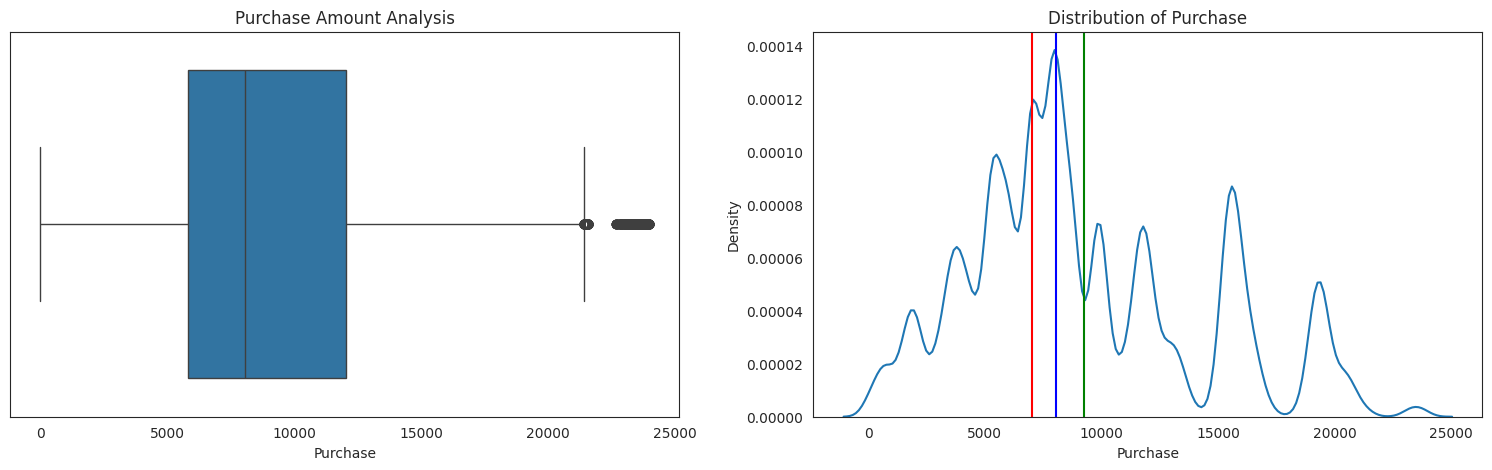

In [ ]:
fig=plt.figure(figsize=(19,5))
sns.set_style('white')
plt.subplot(1,2,1)
plt.title('Purchase Amount Analysis')

sns.boxplot(data=df,x='Purchase',orient='h')

plt.subplot(1,2,2)
plt.title("Distribution of Purchase")
sns.kdeplot(x=df['Purchase'])
plt.axvline(df["Purchase"].mean(),color="g")
plt.axvline(df["Purchase"].median(),color="b")
plt.axvline(df["Purchase"].mode()[0],color="r")

plt.show()


**Observations**

There are outliers in purchase amount.
While observing the distribution of purchase amount from density plot. It is quite obvious that the distribution is right skewed means majority of data concentrated on left side.
Majority of customer purchase within 5,000 - 20,000 range.

**Handling Outliers**

In [ ]:
# Calculating Q3,Q1 and IQR

Q3=np.percentile(df['Purchase'],75)
Q1=np.percentile(df['Purchase'],25)
IQR=Q3-Q1

#Calculating upper and lower bound values

upper_bound= Q3+ 1.5*IQR
lower_bound= Q1-1.5*IQR

#Outlier count

upper_count_values= len(df[df['Purchase']>upper_bound])
lower_count_values= len(df[df['Purchase']<lower_bound])
total_values= upper_count_values+lower_count_values

print(" Upper count values ", upper_count_values)
print("Lower count values ", lower_count_values)
print("Total outlier values", total_values)

 Upper count values  2677
Lower count values  0
Total outlier values 2677


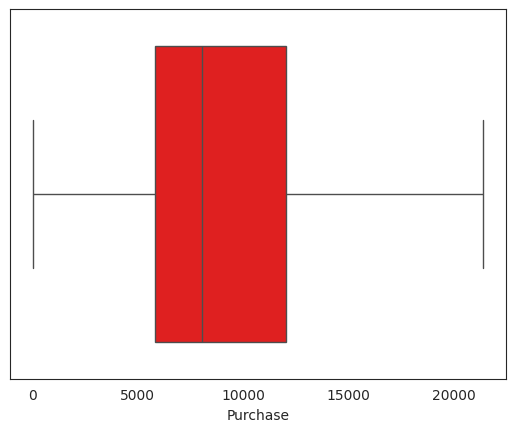

In [ ]:
clipped_data=np.clip(df['Purchase'],lower_bound,upper_bound)

sns.boxplot(data=clipped_data,orient='h',color='r')
plt.show()

In [ ]:
#
# Map numerical values in 'Marital_Status' to categorical labels

df['Marital_Status']=df['Marital_Status'].apply(lambda x:'Married' if x==1 else 'Single')
df.head(20)

User_ID Product_ID Gender    Age Occupation City_Category  \
0   1000001  P00069042      F   0-17         10             A   
1   1000001  P00248942      F   0-17         10             A   
2   1000001  P00087842      F   0-17         10             A   
3   1000001  P00085442      F   0-17         10             A   
4   1000002  P00285442      M    55+         16             C   
5   1000003  P00193542      M  26-35         15             A   
6   1000004  P00184942      M  46-50          7             B   
7   1000004  P00346142      M  46-50          7             B   
8   1000004   P0097242      M  46-50          7             B   
9   1000005  P00274942      M  26-35         20             A   
10  1000005  P00251242      M  26-35         20             A   
11  1000005  P00014542      M  26-35         20             A   
12  1000005  P00031342      M  26-35         20             A   
13  1000005  P00145042      M  26-35         20             A   
14  1000006  P00231342      F  51-55          9             A   
15  1000006  P00190242      F  51-55          9             A   
16  1000006   P0096642      F  51-55          9             A   
17  1000006  P00058442      F  51-55          9             A   
18  1000007  P00036842      M  36-45          1             B   
19  1000008  P00249542      M  26-35         12             C   

   Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                           2         Single                3      8370  
1                           2         Single                1     15200  
2                           2         Single               12      1422  
3                           2         Single               12      1057  
4                          4+         Single                8      7969  
5                           3         Single                1     15227  
6                           2        Married                1     19215  
7                           2        Married                1     15854  
8                           2        Married                1     15686  
9                           1        Married                8      7871  
10                          1        Married                5      5254  
11                          1        Married                8      3957  
12                          1        Married                8      6073  
13                          1        Married                1     15665  
14                          1         Single                5      5378  
15                          1         Single                4      2079  
16                          1         Single                2     13055  
17                          1         Single                5      8851  
18                          1        Married                1     11788  
19                         4+        Married                1     19614

**Univariate Analysis**



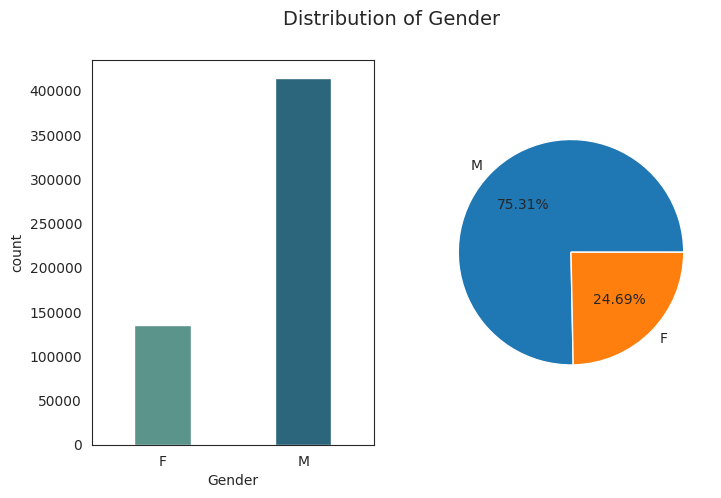

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.set_style(style='white')
plt.subplot(1,2,1)
sns.countplot(data=df, x="Gender", palette="crest", hue='Gender', legend=False,width=0.4)

#first row sec column
plt.subplot(1,2,2)
plt.pie(df["Gender"].value_counts(),
        labels = df["Gender"].value_counts().index,
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Gender', fontsize = 14)

plt.show()

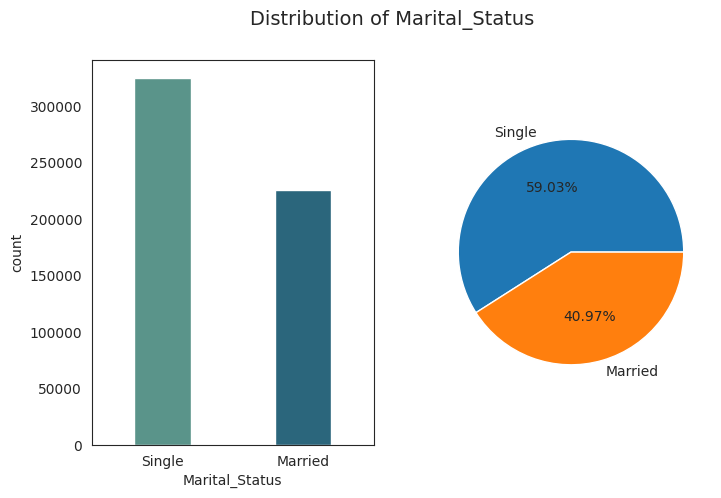

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.set_style(style='white')
plt.subplot(1,2,1)
sns.countplot(data=df, x="Marital_Status", palette="crest", hue='Marital_Status', legend=False,width=0.4)

#first row sec column
plt.subplot(1,2,2)
plt.pie(df["Marital_Status"].value_counts(),
        labels = df["Marital_Status"].value_counts().index,
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Marital_Status', fontsize = 14)

plt.show()

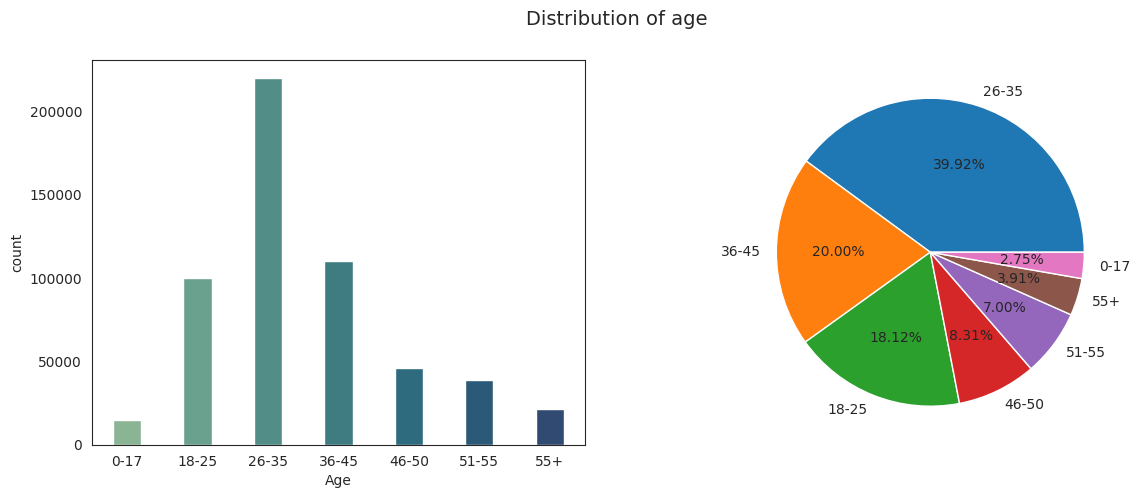

In [ ]:
fig=plt.figure(figsize=(14,5))
sns.set_style(style='white')
plt.subplot(1,2,1)
sns.countplot(data=df, x="Age", palette="crest", hue='Age', legend=False,width=0.4)

#first row sec column
plt.subplot(1,2,2)
plt.pie(df["Age"].value_counts(),
        labels = df["Age"].value_counts().index,
        autopct = '%1.2f%%')
plt.suptitle('Distribution of age', fontsize = 14)

plt.show()

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

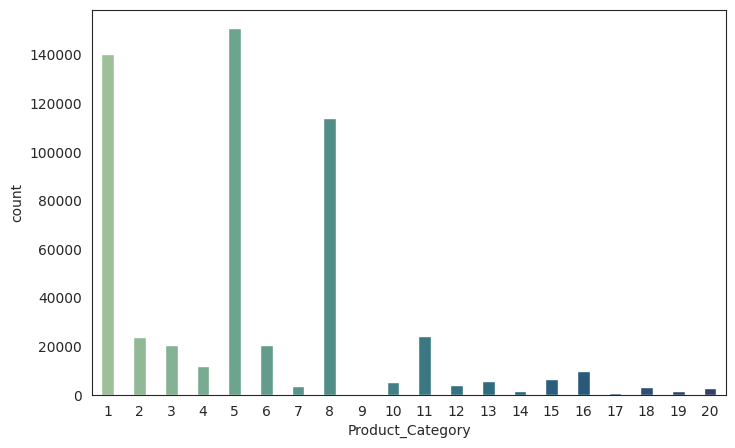

In [ ]:
fig=plt.figure(figsize=(18,5))
sns.set_style(style='white')
plt.subplot(1,2,1)
sns.countplot(data=df, x="Product_Category", palette="crest", hue='Product_Category', legend=False,width=0.4)

plt.show()

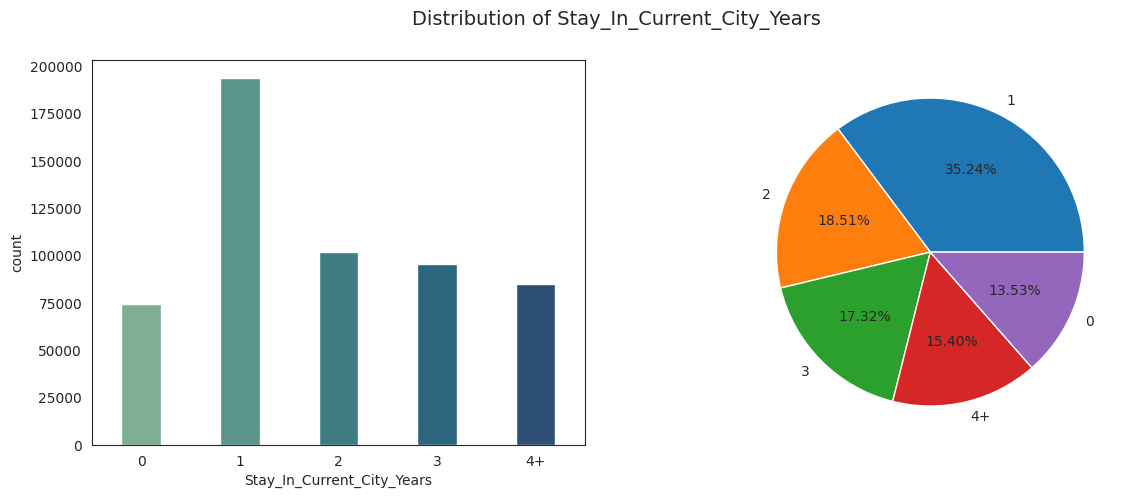

In [ ]:
fig=plt.figure(figsize=(14,5))
sns.set_style(style='white')
plt.subplot(1,2,1)
sns.countplot(data=df, x="Stay_In_Current_City_Years", palette="crest", hue='Stay_In_Current_City_Years', legend=False,width=0.4)

#first row sec column
plt.subplot(1,2,2)
plt.pie(df['Stay_In_Current_City_Years'].value_counts(),
        labels = df['Stay_In_Current_City_Years'].value_counts().index,
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Stay_In_Current_City_Years', fontsize = 14)

plt.show()

**Observations:**
Age Group Distribution:

The age group '26-35' has the highest count, indicating that customers in this age range make the most purchases. It is followed by the age groups '36-45' and '18-25'.

City Category Distribution:

City_Category 'B' has the highest count, indicating that customers from City_Category 'B' have made the most purchases. City_Category 'C' and 'A' follow in terms of count.

Marital Status Impact:

Customers with a marital status of 'Single' have a higher count compared to those who are 'Married', suggesting that single individuals make more purchases in the dataset.

City Residence Duration Impact:

Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing behavior.
Product Category Purchase Analysis:

Product categories '1' and '5' exhibit higher purchase amounts, indicating that these categories contribute significantly to the overall sales revenue.

**Bivariate Analysis**

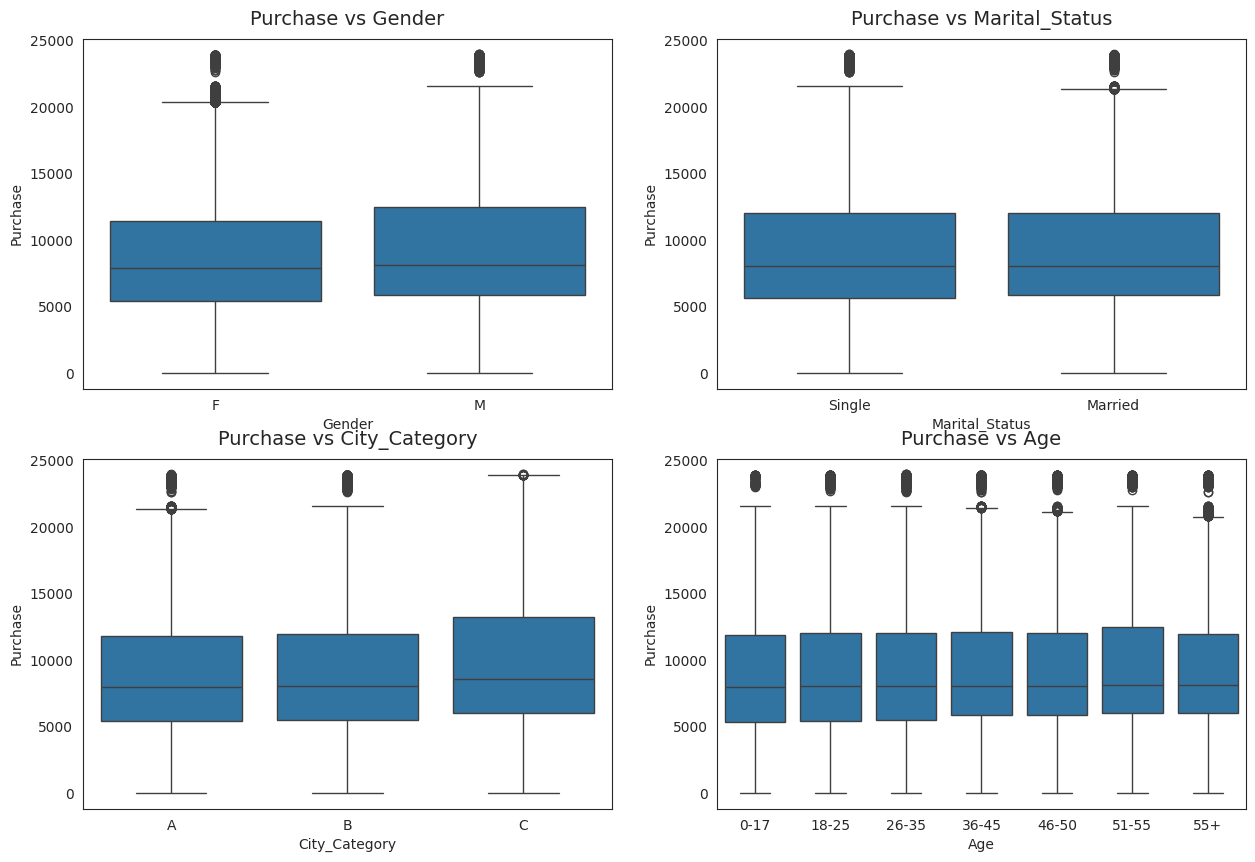

In [ ]:
cat_col = ["Gender", "Marital_Status", "City_Category", "Age"]

fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
k = 0
sns.set_style("dark")
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x=cat_col[k], y="Purchase",  ax=axs[i, j])
        axs[i, j].set_title("Purchase vs " + cat_col[k], pad = 10, fontsize = 14)
        k += 1
plt.show()

In [ ]:
category = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

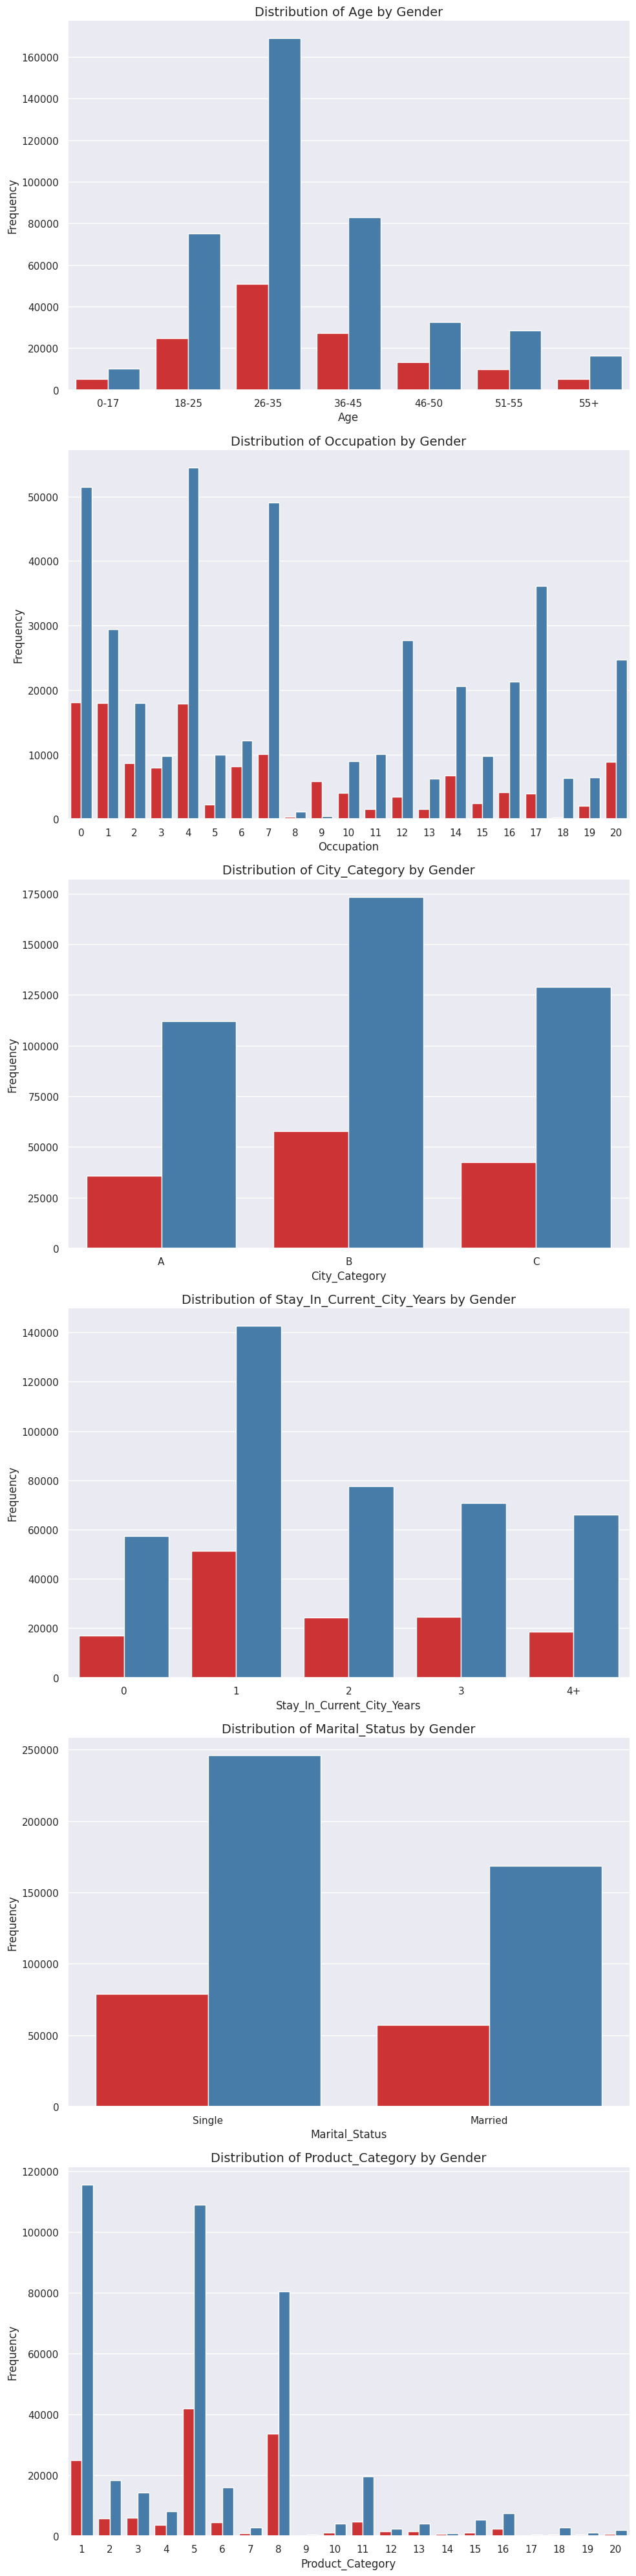

In [ ]:
plt.figure(figsize=(10, 40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    sns.countplot(data=df, x=col, hue='Gender', palette='Set1', legend=False, dodge=True)
    sns.despine()

    # Set labels and title
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {col} by Gender', fontsize=14, fontfamily='sans-serif')

    plt.tight_layout()

plt.show()

**Insights:**

Gender-Related Purchase Analysis:

Across various age groups, males tend to have higher purchase counts compared to females, with the age group '26-35' showing the most significant difference.

Occupation-Related Purchase Analysis:

Occupations '0' and '4' show the highest purchase counts, suggesting that individuals in these occupations contribute significantly to overall sales, with '4' having notably higher purchases than others.
City Category-Related Purchase Analysis:

City_Category 'B' has the highest purchase counts for both genders, indicating that customers residing in City_Category 'B' contribute significantly to overall sales compared to 'A' and 'C'.
Stay in Current City Duration Impact:

Customers who have stayed in their current city for 1 year exhibit the highest purchase counts, suggesting that individuals with a 1-year residence duration have a higher tendency to make purchases compared to other durations.
Marital Status-Related Purchase Analysis:

Individuals with a marital status of 'Single' have higher purchase counts compared to those who are 'Married', indicating that single individuals contribute more to overall sales.
Product Category-Related Purchase Analysis:

Product Category '1' has the highest purchase counts, indicating that it significantly contributes to overall sales. Product Categories '5' and '8' also show notable purchase counts.

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df_new=data[['Occupation','Product_Category','Purchase']]
df_new.corr()


Occupation  Product_Category  Purchase
Occupation          1.000000         -0.007618  0.020833
Product_Category   -0.007618          1.000000 -0.343703
Purchase            0.020833         -0.343703  1.000000

<Axes: >

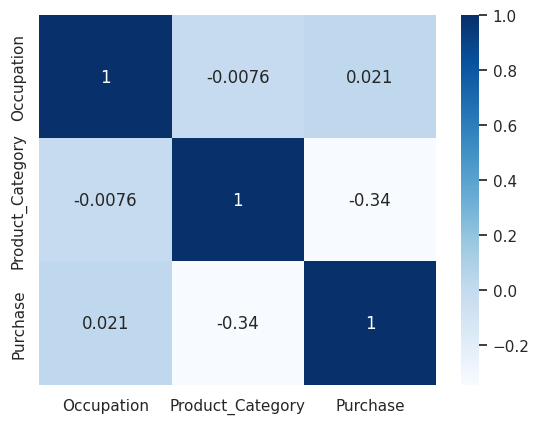

In [ ]:
sns.heatmap(data=df_new.corr(),annot=True, cmap='Blues')

**Balck friday Sales analysis on gender**

In [ ]:
gender_data=df.groupby('Gender').agg({'Purchase':'mean'}).reset_index()
gender_data

Gender     Purchase
0      F  8734.565765
1      M  9437.526040

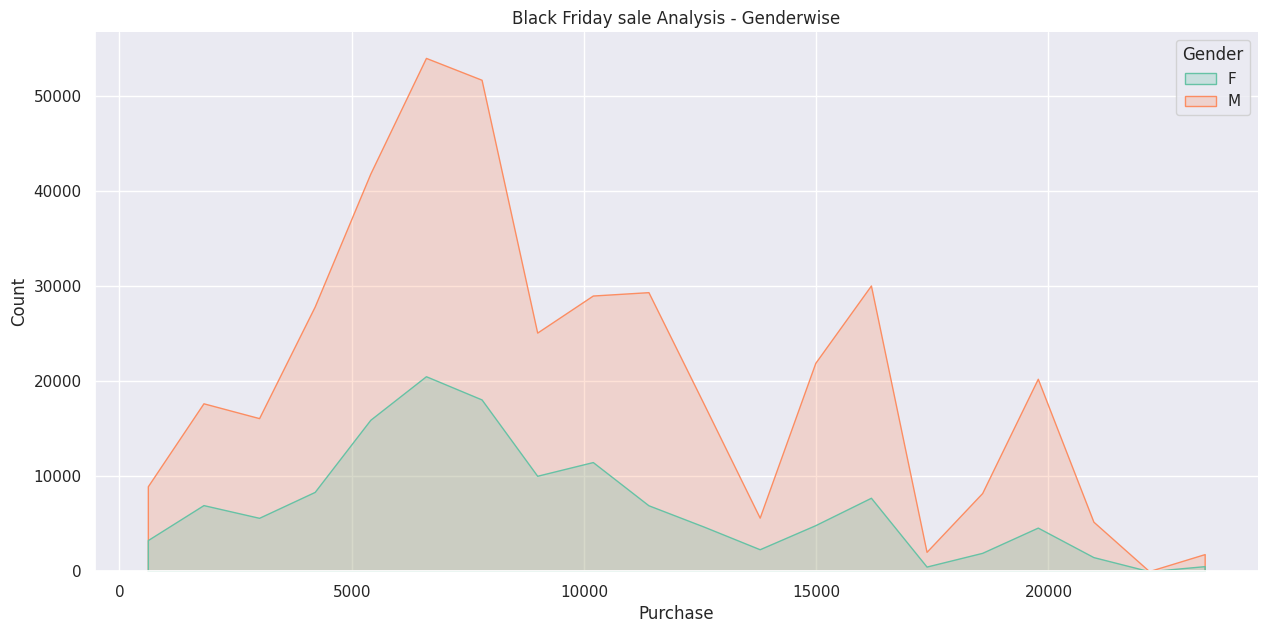

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Gender",element='poly',palette= 'Set2')
sns.despine()
plt.title('Black Friday sale Analysis - Genderwise')
plt.show()

**Insights:**

Men spent more money than women during the Black Friday sale.

The total number of male customers (4225) exceeds the total number of female customers (1666).

The average amount spent by male customers (9437) is higher than the average amount spent by female customers (8734).

With a larger male customer base, it is likely that men will make more purchases compared to females.

The higher sales among male customers could be attributed to a product range better suited to their preferences, leading to increased sales of products targeted towards men.

In [ ]:

gender_data['Purchase Percentage']=gender_data['Purchase']/df['Purchase'].sum()*100
gender_data

Gender     Purchase  Purchase Percentage
0      F  8734.565765             0.000171
1      M  9437.526040             0.000185

<Axes: ylabel='Gender'>

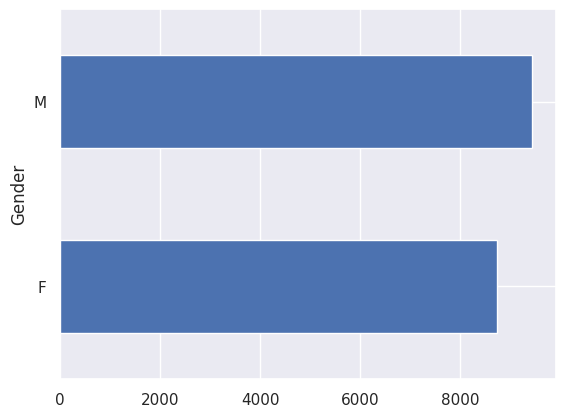

In [ ]:
# @title Average Purchase by Gender

gender_data.groupby('Gender')['Purchase'].mean().plot(kind='barh')

In [ ]:
age_data=df.groupby(['Age']).agg({'Purchase':'sum'}).reset_index()
age_data

Age    Purchase
0   0-17   134913183
1  18-25   913848675
2  26-35  2031770578
3  36-45  1026569884
4  46-50   420843403
5  51-55   367099644
6    55+   200767375

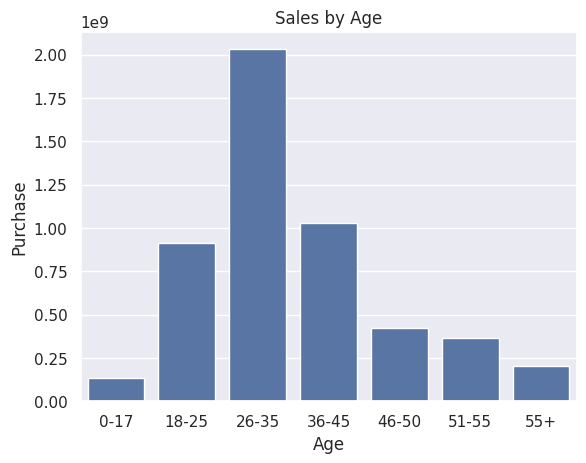

In [ ]:
sns.barplot(data=age_data,x='Age',y='Purchase')
plt.title("Sales by Age")
plt.show()

**CLT and Confidence Intervals**

**Male Vs Female Purchase Values**

In [ ]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [ ]:
def sampling(sample1,sample2,sample_size,itr_size,ci):
    ci = ci/100

    plt.figure(figsize=(10,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    # sem1 = sem(sample1_n)

    # lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    # upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    ci_arr1= norm.interval(confidence=ci,loc=np.mean(sample1_n),scale=np.std(sample1_n)/np.sqrt(sample_size))
    lower_limit_1 = ci_arr1[0]
    upper_limit_1 = ci_arr1[1]

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    ci_arr2= norm.interval(confidence=ci,loc=np.mean(sample2_n),scale=np.std(sample2_n)/np.sqrt(sample_size))
    lower_limit_2 = ci_arr2[0]
    upper_limit_2 = ci_arr2[1]

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Female Avg:{np.round(mean2, 2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')


    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

**Lets plot the mean of 1000 Random Samples of sizes 10,100,1000 and 10000 with 90% Confidence Interval**

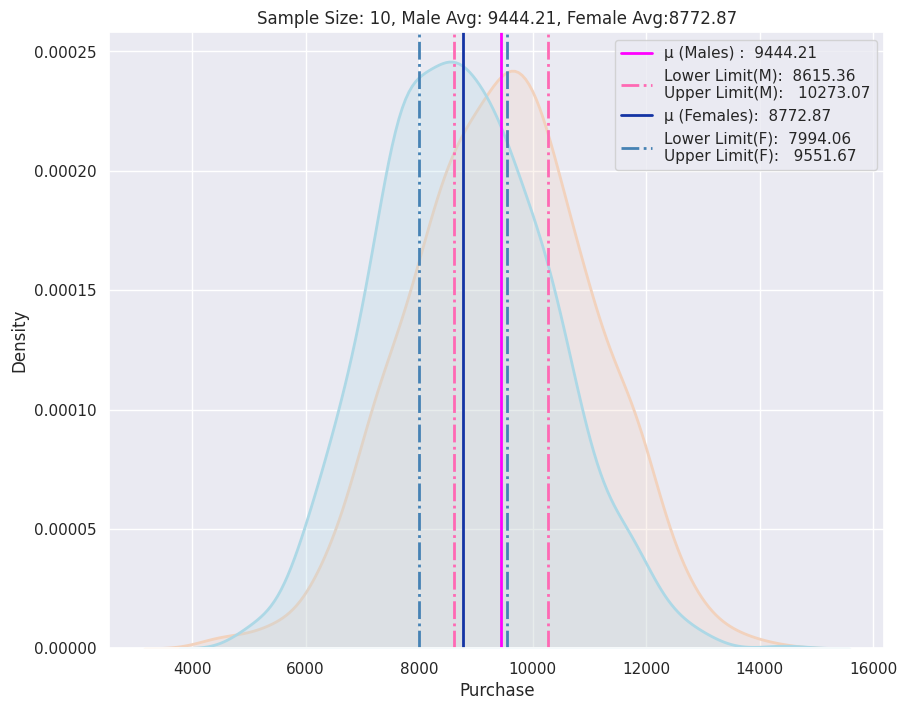

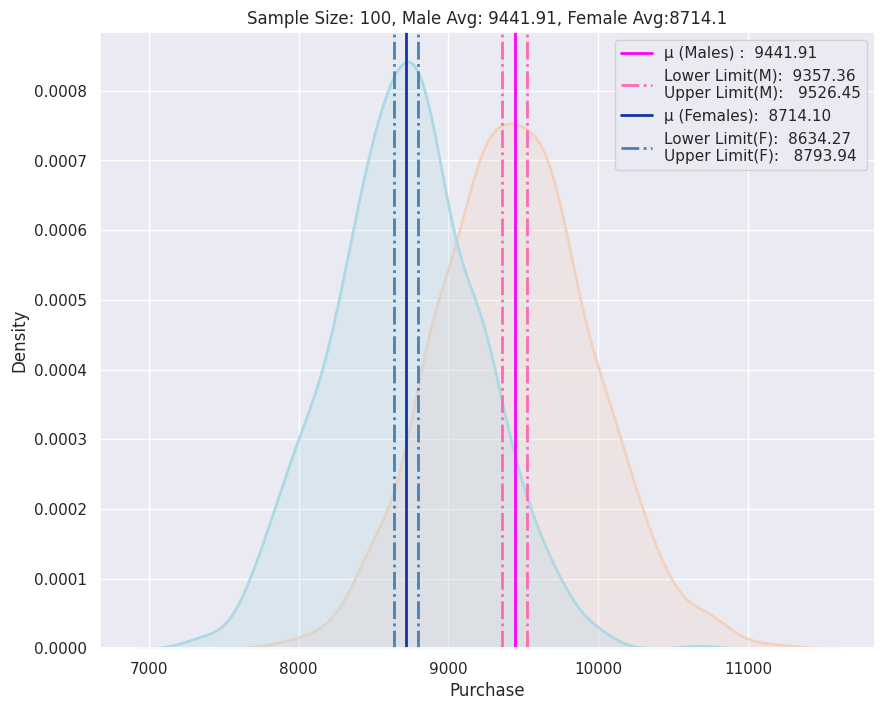

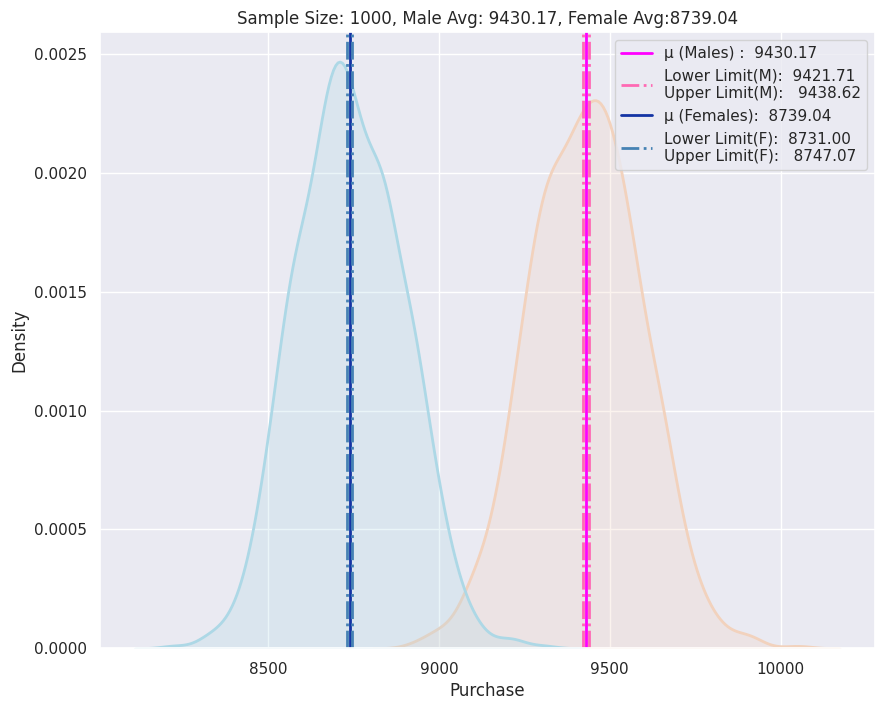

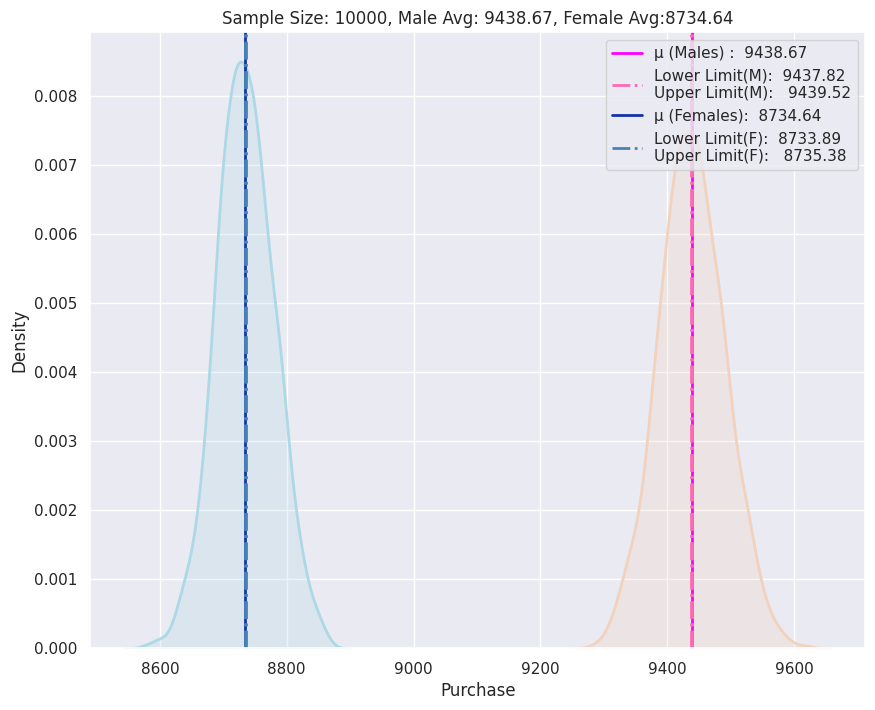

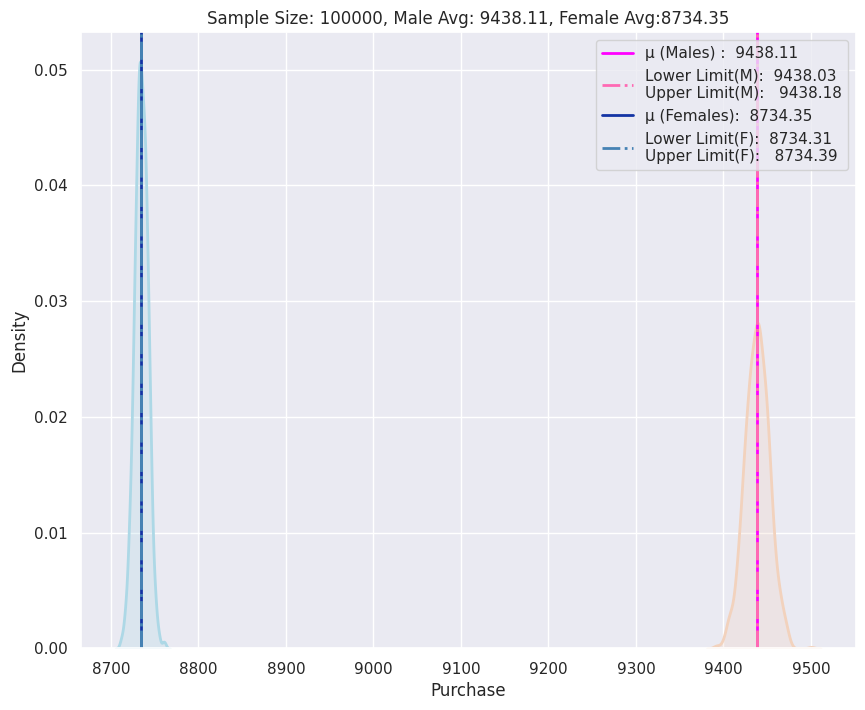

In [ ]:
sample_sizes = sample_sizes = [10,100,1000,10000,100000]
ci = 90
itr_size = 1000

res = pd.DataFrame(columns = ['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = sampling(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res.loc[len(res.index)] = {'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}
    res.loc[len(res.index)] = {'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}

**Lets plot the mean of 1000 Random Samples of sizes 10,100,1000,10000 and 100000 with 95% Confidence Interval**

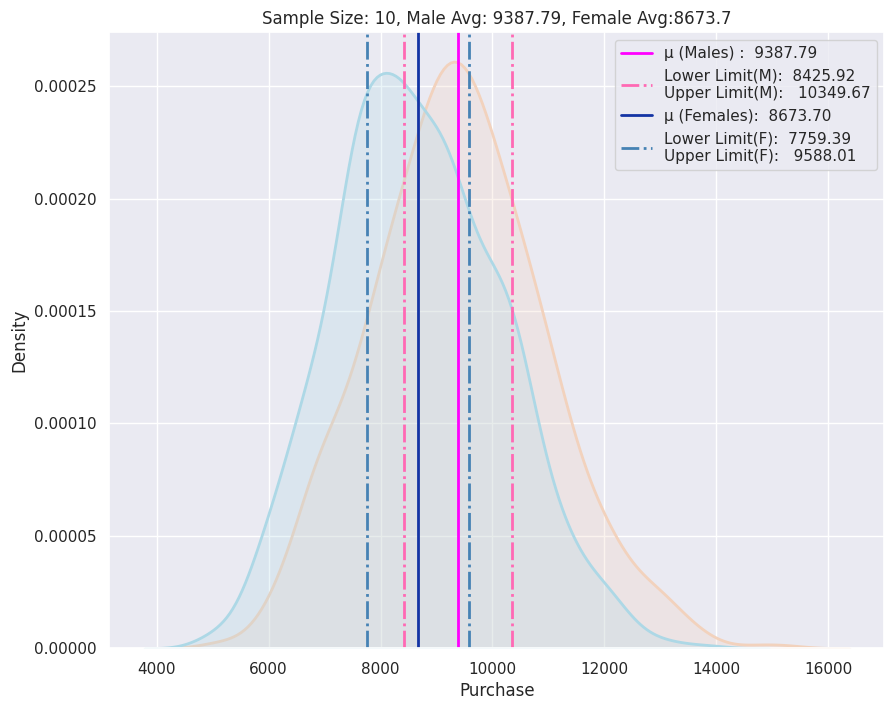

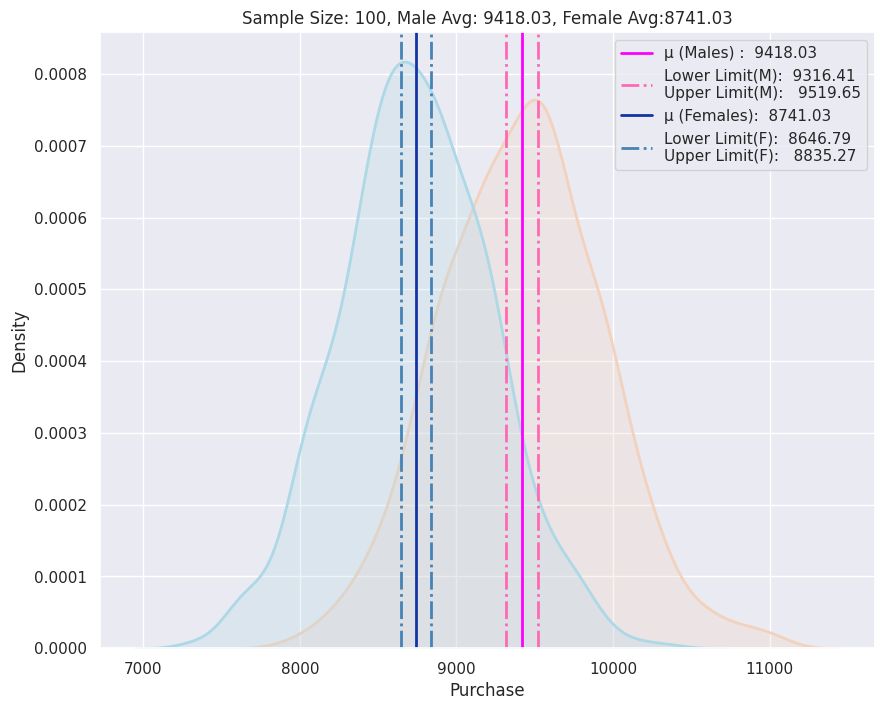

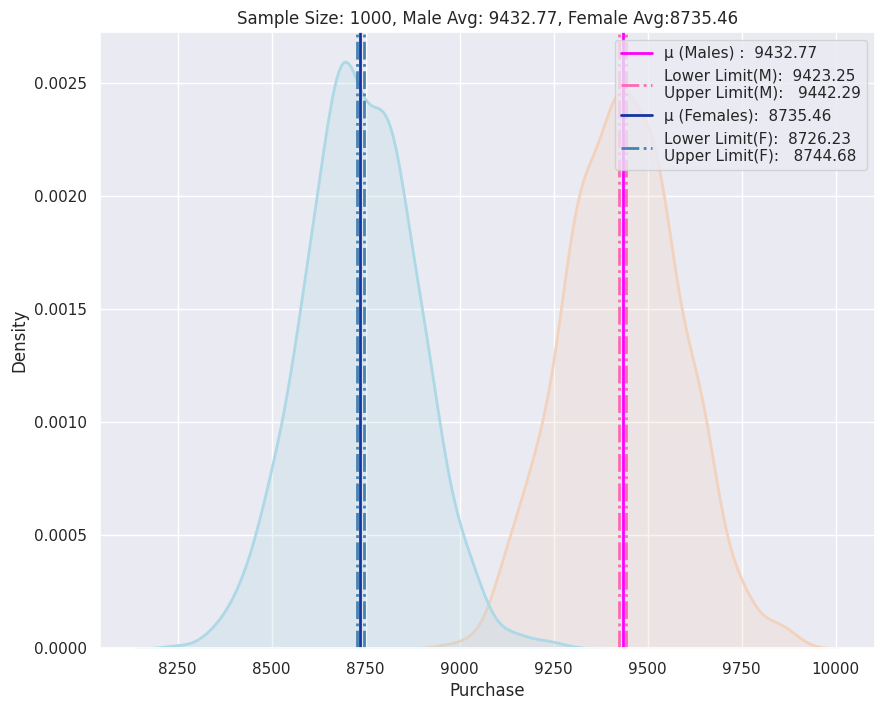

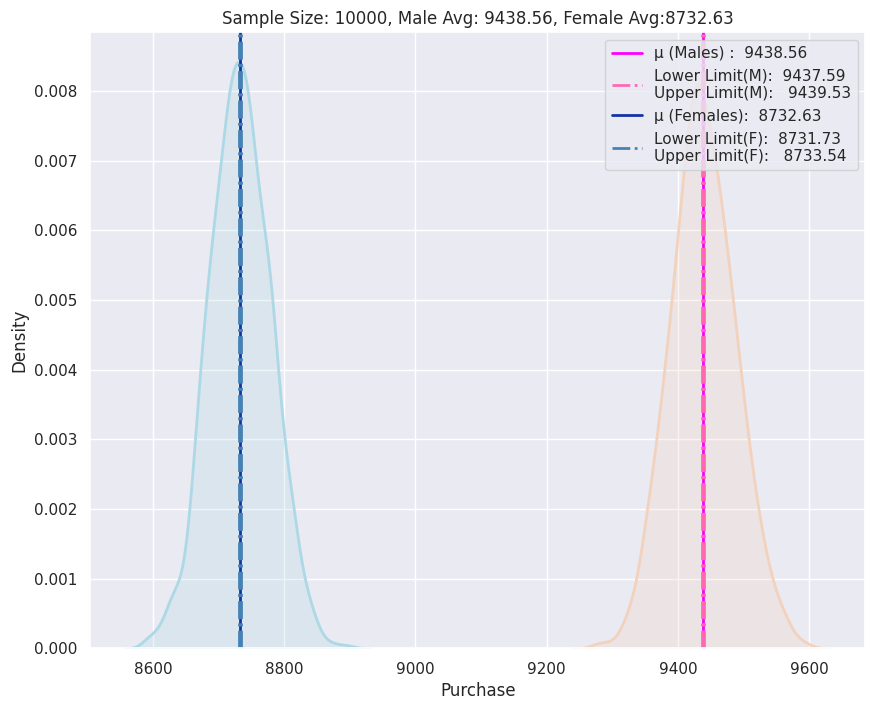

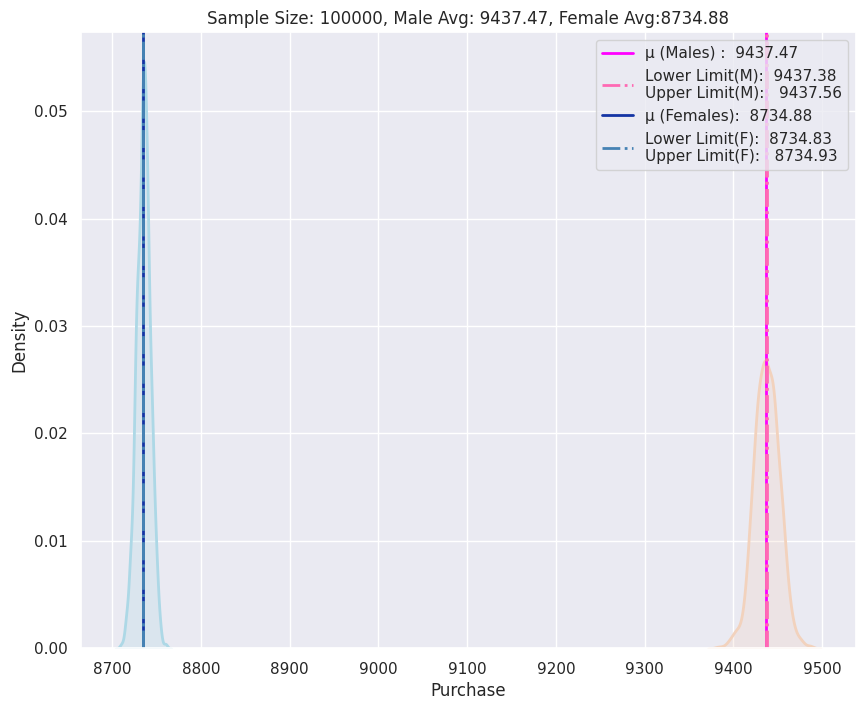

In [ ]:
sample_sizes = sample_sizes = [10,100,1000,10000,100000]
ci = 95
itr_size = 1000

# res = pd.DataFrame(columns = ['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = sampling(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res.loc[len(res.index)] = {'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}
    res.loc[len(res.index)] = {'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}

In [ ]:
res

Gender  Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       M           10      8615.36     10273.07      9444.21   
1       F           10      7994.06      9551.67      8772.87   
2       M          100      9357.36      9526.45      9441.91   
3       F          100      8634.27      8793.94      8714.10   
4       M         1000      9421.71      9438.62      9430.17   
5       F         1000      8731.00      8747.07      8739.04   
6       M        10000      9437.82      9439.52      9438.67   
7       F        10000      8733.89      8735.38      8734.64   
8       M       100000      9438.03      9438.18      9438.11   
9       F       100000      8734.31      8734.39      8734.35   
10      M           10      8425.92     10349.67      9387.79   
11      F           10      7759.39      9588.01      8673.70   
12      M          100      9316.41      9519.65      9418.03   
13      F          100      8646.79      8835.27      8741.03   
14      M         1000      9423.25      9442.29      9432.77   
15      F         1000      8726.23      8744.68      8735.46   
16      M        10000      9437.59      9439.53      9438.56   
17      F        10000      8731.73      8733.54      8732.63   
18      M       100000      9437.38      9437.56      9437.47   
19      F       100000      8734.83      8734.93      8734.88   

    Confidence Interval       Interval Range    Range  
0                    90  [8615.36, 10273.07]  1657.71  
1                    90   [7994.06, 9551.67]  1557.61  
2                    90   [9357.36, 9526.45]   169.09  
3                    90   [8634.27, 8793.94]   159.67  
4                    90   [9421.71, 9438.62]    16.91  
5                    90    [8731.0, 8747.07]    16.07  
6                    90   [9437.82, 9439.52]     1.70  
7                    90   [8733.89, 8735.38]     1.49  
8                    90   [9438.03, 9438.18]     0.15  
9                    90   [8734.31, 8734.39]     0.08  
10                   95  [8425.92, 10349.67]  1923.75  
11                   95   [7759.39, 9588.01]  1828.62  
12                   95   [9316.41, 9519.65]   203.24  
13                   95   [8646.79, 8835.27]   188.48  
14                   95   [9423.25, 9442.29]    19.04  
15                   95   [8726.23, 8744.68]    18.45  
16                   95   [9437.59, 9439.53]     1.94  
17                   95   [8731.73, 8733.54]     1.81  
18                   95   [9437.38, 9437.56]     0.18  
19                   95   [8734.83, 8734.93]     0.10

**Observations:**
We can observe that

The CI with 90% confidence for sample size 10 for Males is [6653.41, 12210.87]

The CI with 90% confidence for sample size 10 for Females is [6245.08, 11265.77]

For Sample size 10 The confidence interval for both Male and Female is overlapping

and as the sample size increases, we can see the interval ranges seperating and then finally they both dont overalap.

The CI with 90% confidence for sample size 100000 for Males is [9415.08, 9460.27]

The CI with 90% confidence for sample size 100000 for Females is [8721.97, 8747.07]

For Sample size 100000 The confidence interval for both Male and Female is now not overlapping.

We can also observe the same with 95% Confidence.

The CI with 95% confidence for sample size 10 for Males is [6335.11, 12484.27]

The CI with 95% confidence for sample size 10 for Females is [5728.62, 11778.12]

For Sample size 10 The confidence interval for both Male and Female is overlapping

and as the sample size increases, we can see the interval ranges seperating and then finally they both dont overalap.

The CI with 95% confidence for sample size 100000 for Males is [9410.99, 9465.95]

The CI with 95% confidence for sample size 100000 for Females is [8719.59, 8750.12]

For Sample size 100000 The confidence interval for both Male and Female is now not overlapping.

In [ ]:
def sampling_maritalstatus(sample1,sample2,sample_size,itr_size,ci):
    ci = ci/100

    plt.figure(figsize=(10,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    # sem1 = sem(sample1_n)

    # lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    # upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    ci_arr1= norm.interval(confidence=ci,loc=np.mean(sample1_n),scale=np.std(sample1_n)/np.sqrt(sample_size))
    lower_limit_1 = ci_arr1[0]
    upper_limit_1 = ci_arr1[1]

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    ci_arr2= norm.interval(confidence=ci,loc=np.mean(sample2_n),scale=np.std(sample2_n)/np.sqrt(sample_size))
    lower_limit_2 = ci_arr2[0]
    upper_limit_2 = ci_arr2[1]

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Unmarried Avg:{np.round(mean2, 2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')


    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

In [ ]:
df_married = df[df['Marital_Status'] == 'Married']
df_unmarried = df[df['Marital_Status'] == 'Single']
df_unmarried

User_ID Product_ID Gender    Age Occupation City_Category  \
0       1000001  P00069042      F   0-17         10             A   
1       1000001  P00248942      F   0-17         10             A   
2       1000001  P00087842      F   0-17         10             A   
3       1000001  P00085442      F   0-17         10             A   
4       1000002  P00285442      M    55+         16             C   
...         ...        ...    ...    ...        ...           ...   
550056  1006022  P00375436      M  26-35         17             C   
550059  1006025  P00370853      F  26-35          1             B   
550062  1006032  P00372445      M  46-50          7             A   
550064  1006035  P00375436      F  26-35          1             C   
550066  1006038  P00375436      F    55+          1             C   

       Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                               2         Single                3      8370  
1                               2         Single                1     15200  
2                               2         Single               12      1422  
3                               2         Single               12      1057  
4                              4+         Single                8      7969  
...                           ...            ...              ...       ...  
550056                         4+         Single               20       254  
550059                          1         Single               19        48  
550062                          3         Single               20       473  
550064                          3         Single               20       371  
550066                          2         Single               20       365  

[324731 rows x 10 columns]

**Lets plot the mean of 1000 Random Samples of sizes 10,100,1000,10000 and 100000 with 90% Confidence Interval**

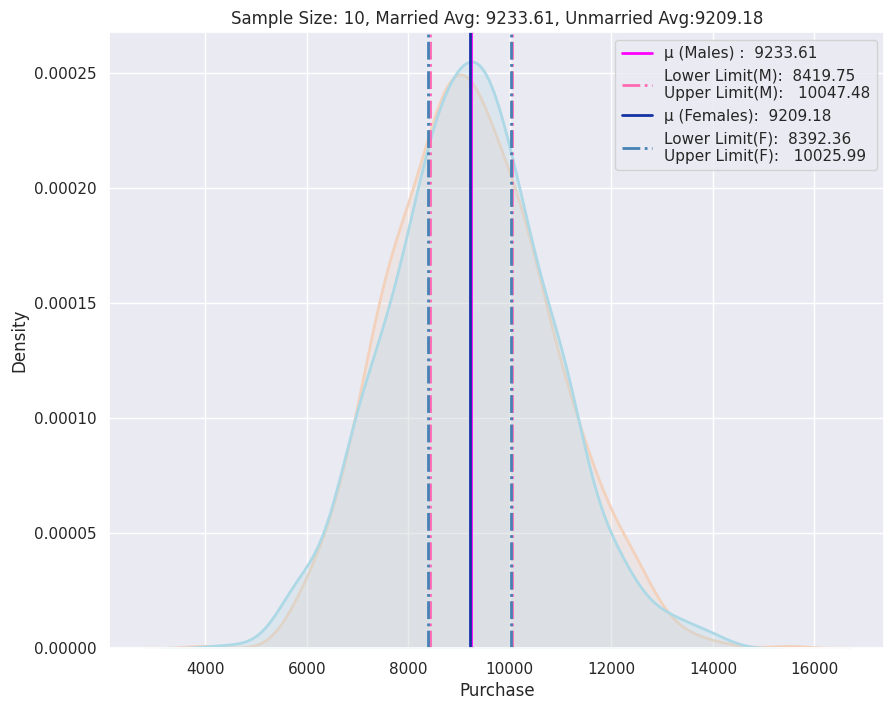

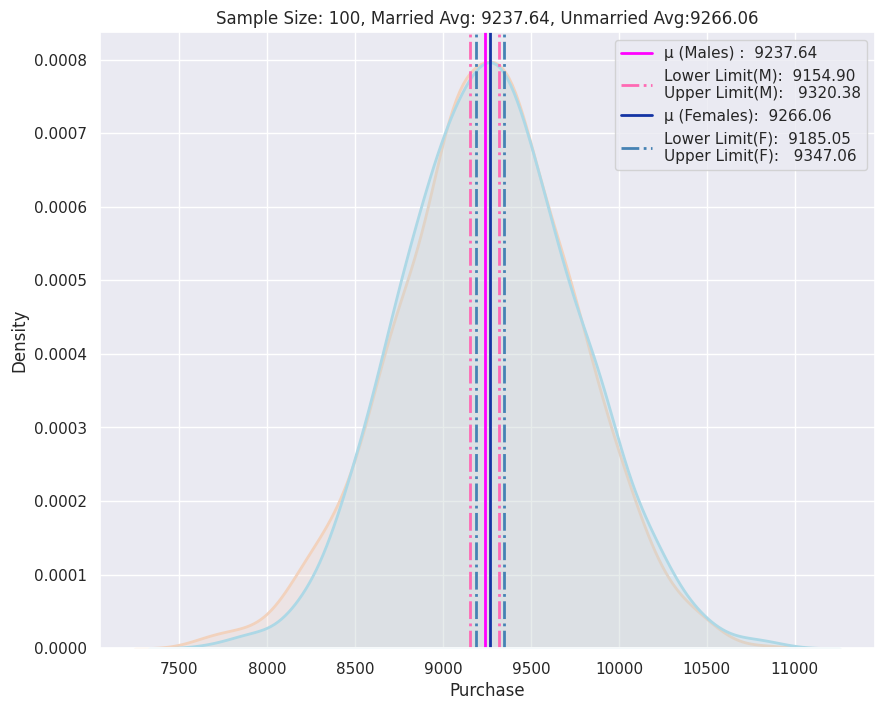

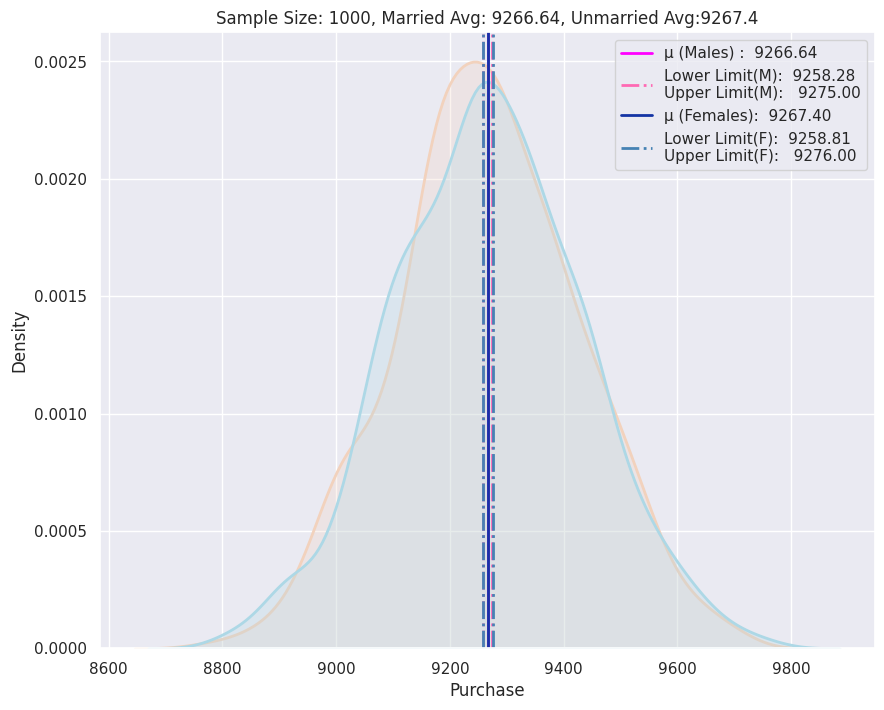

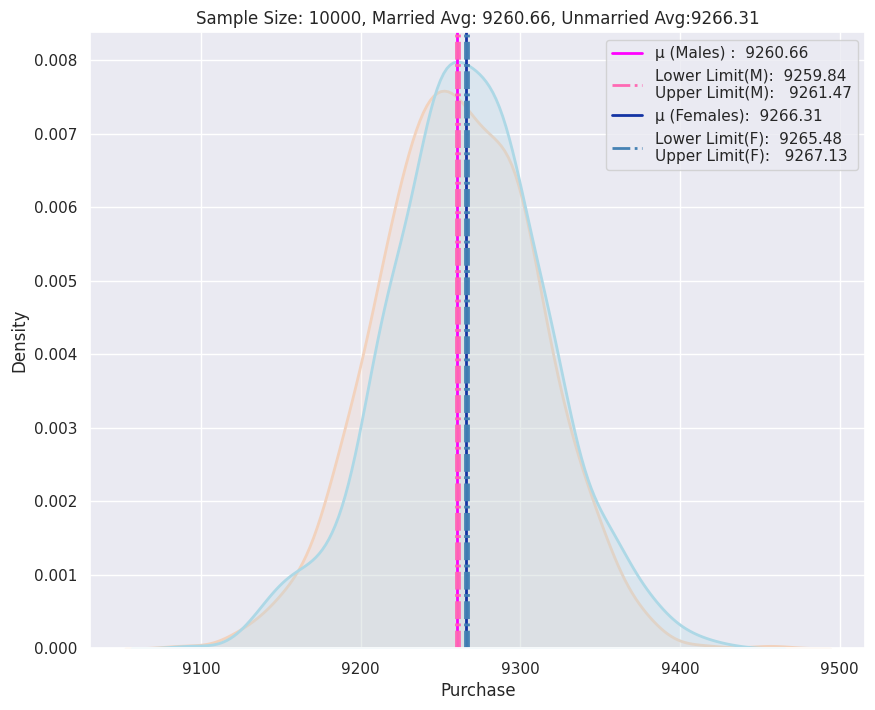

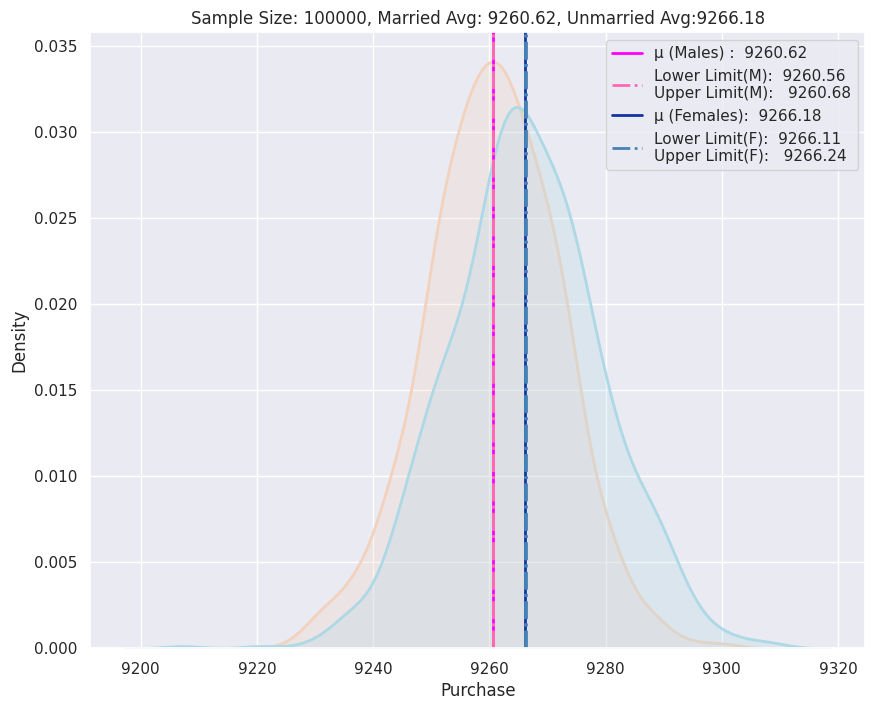

In [ ]:
sample_sizes = sample_sizes = [10,100,1000,10000,100000]
ci = 90
itr_size = 1000

res1 = pd.DataFrame(columns = ['Marital Status','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = sampling_maritalstatus(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    res1.loc[len(res1.index)] = {'Marital Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}
    res1.loc[len(res1.index)] = {'Marital Status':'Single','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}

**Lets plot the mean of 1000 Random Samples of sizes 10,100,1000,10000 and 100000 with 95% Confidence Interval**

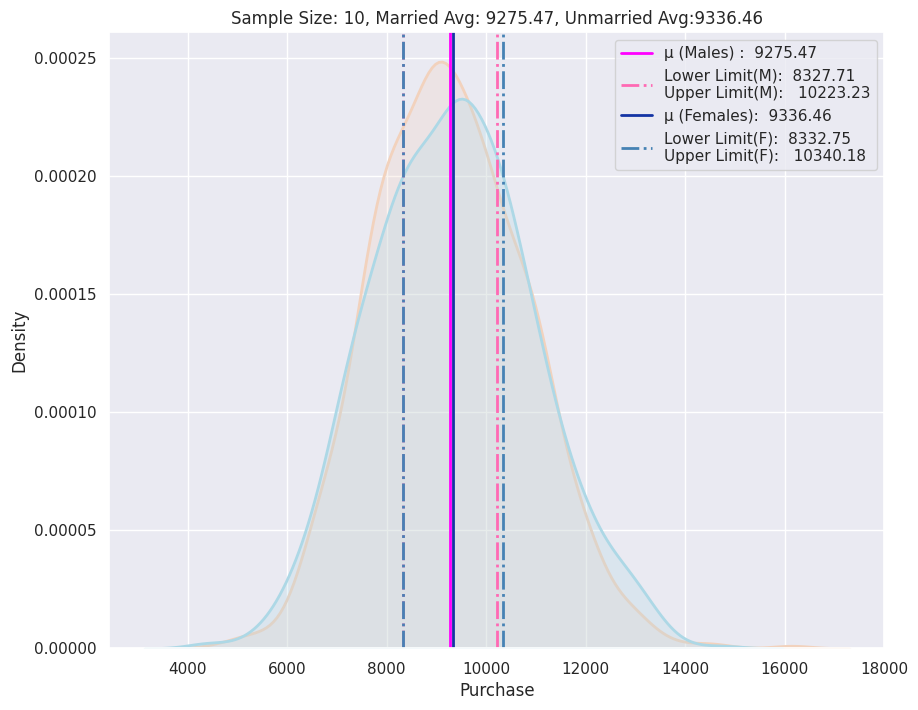

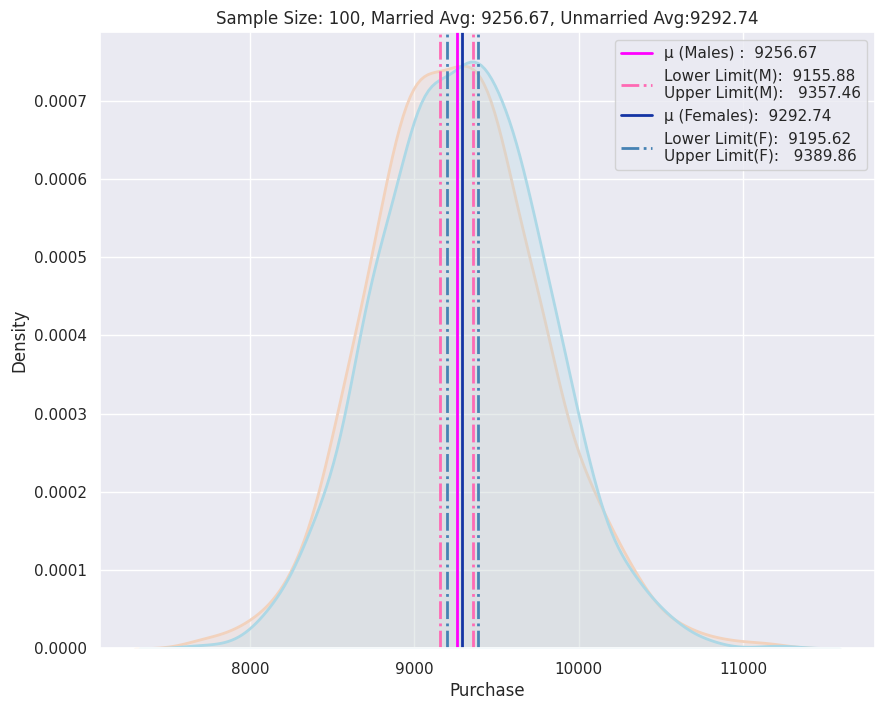

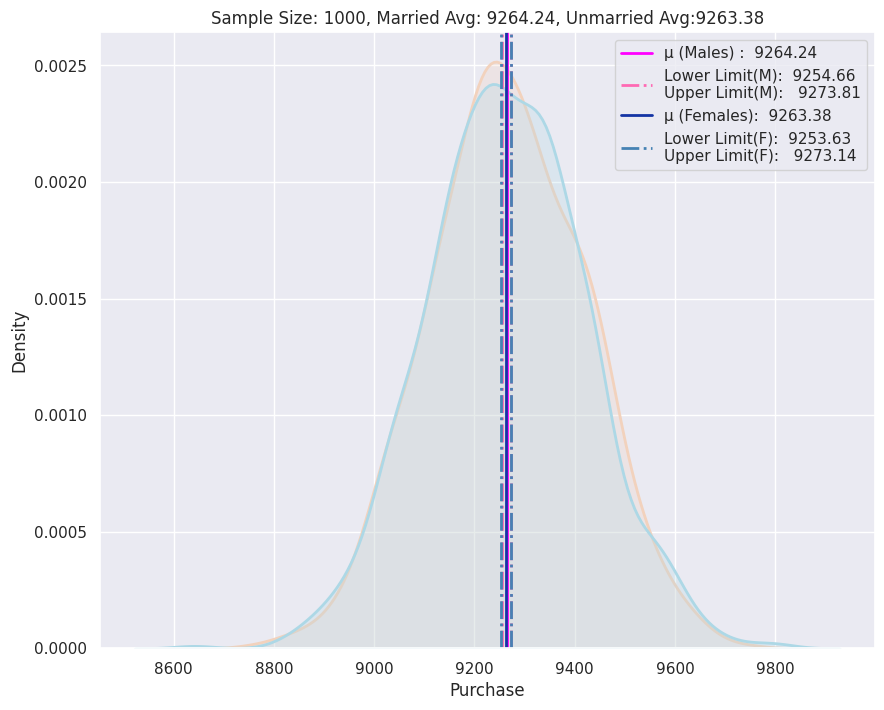

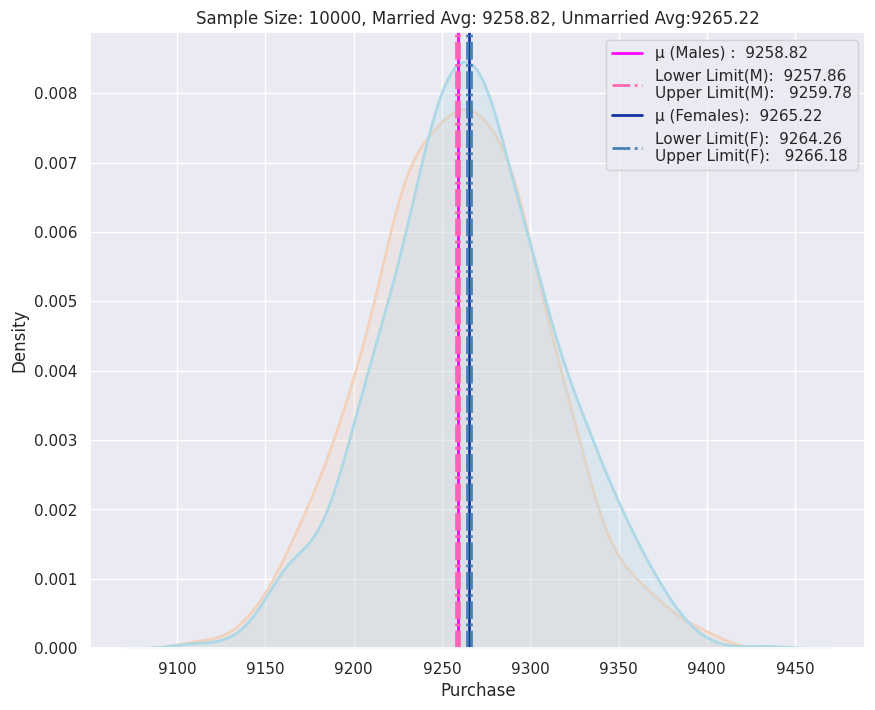

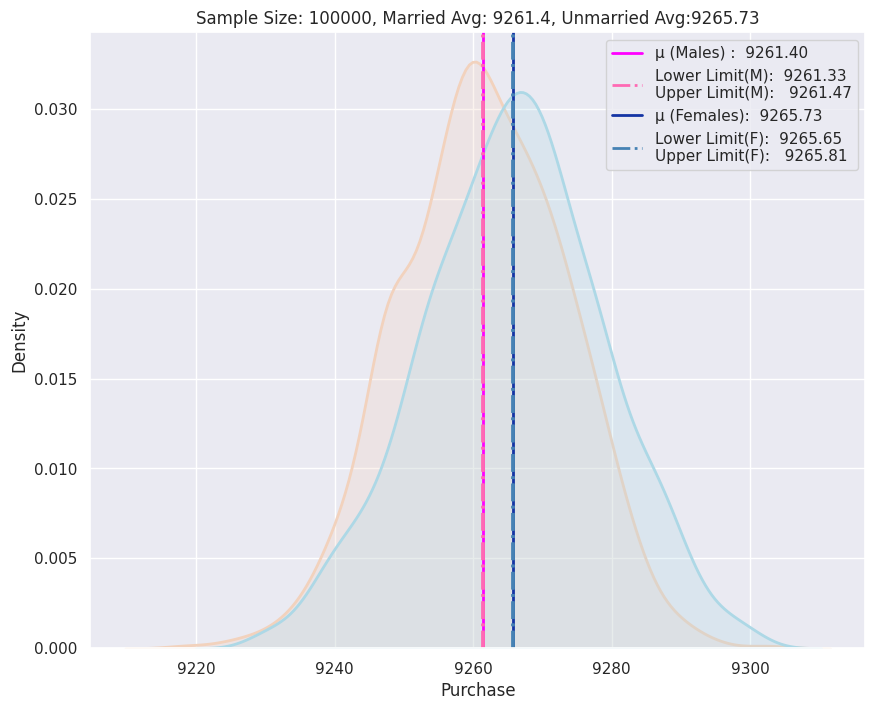

In [ ]:
sample_sizes = sample_sizes = [10,100,1000,10000,100000]
ci = 95
itr_size = 1000

# res1 = pd.DataFrame(columns = ['Marital Status','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = sampling_maritalstatus(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    res1.loc[len(res1.index)] = {'Marital Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}
    res1.loc[len(res1.index)] = {'Marital Status':'Single','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}

Deep Dive into the confidence intervals of Married vs UnMarried

In [ ]:
res1

For married and unmarried customers, sample size 10, confidence interval 90 we can observe that the interval range is overlapping

For married and unmarried customers, sample size 100000, confidence interval 90 we can observe that the interval range is still overlapping

This means there is no effect of marital status on purchase habits of customers

In [ ]:
def sampling_age(sample, sample_size, itr_size, ci):
    ci = ci/100

    global flag

    sample_n = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]

    mean  = np.mean(sample_n)
    sigma = np.std(sample_n)
    ci_arr= norm.interval(confidence=ci,loc=np.mean(sample_n),scale=np.std(sample_n)/np.sqrt(sample_size))
    lower_limit = ci_arr[0]
    upper_limit = ci_arr[1]

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=sample_n,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"Age Group: {age_group[flag]}, Sample Size: {sample_size}, Mean:{np.round(mean,2)}",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'dotted', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'dotted', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    flag += 1

    return sample_n ,np.round(lower_limit,2),np.round(upper_limit,2), round(mean,2)

**Lets visualise the graphs of 1000 mean values of purchase samples for sample size of 1000 for all the age groups with 90% confidence interval.**

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
np.mean(df[df['Age']=='0-17']['Purchase'])

8933.464640444974

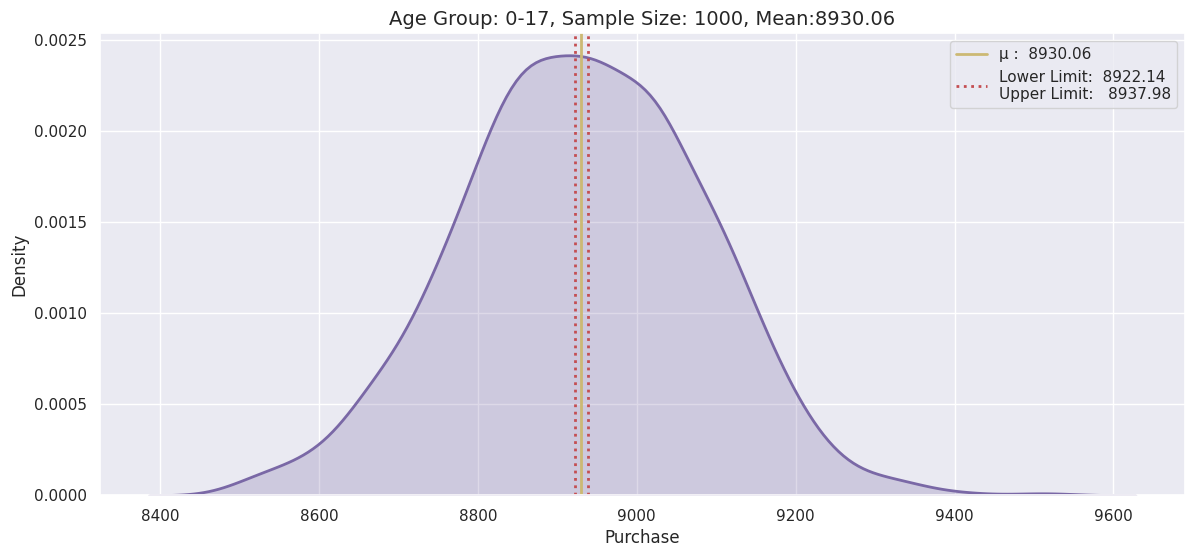

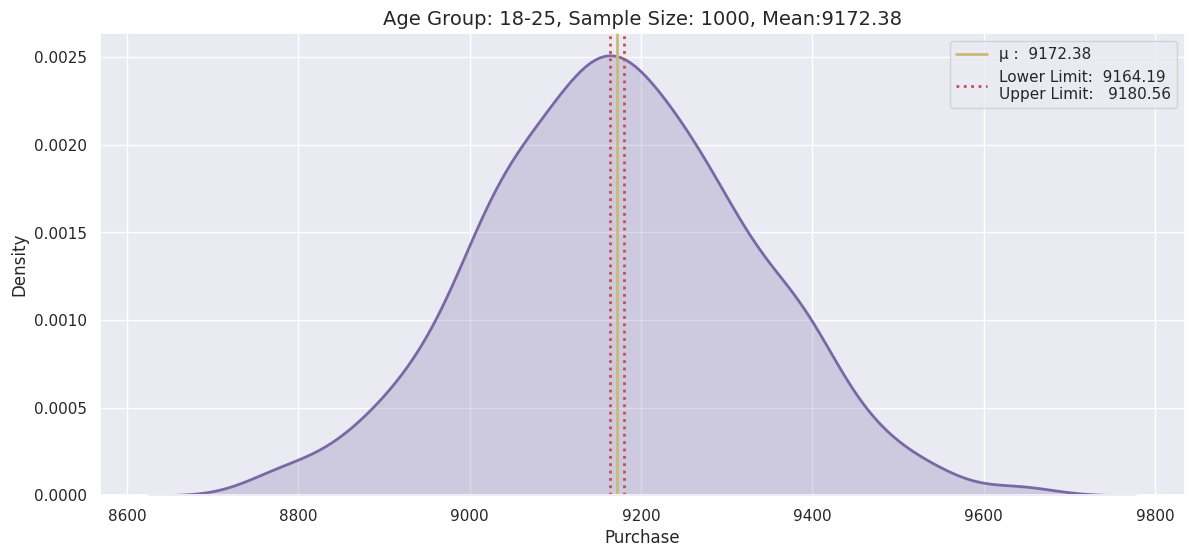

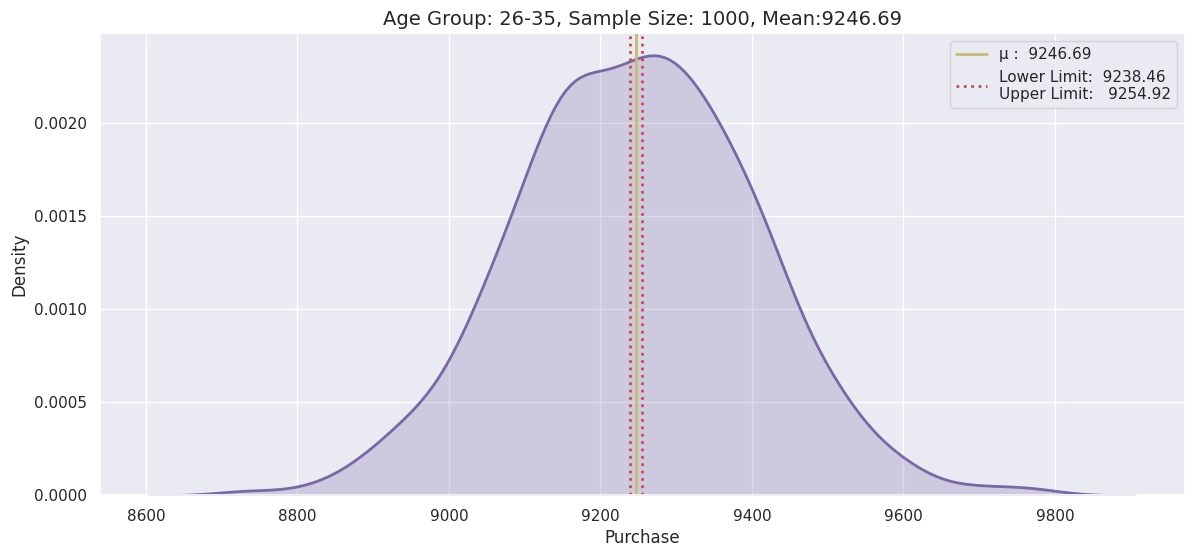

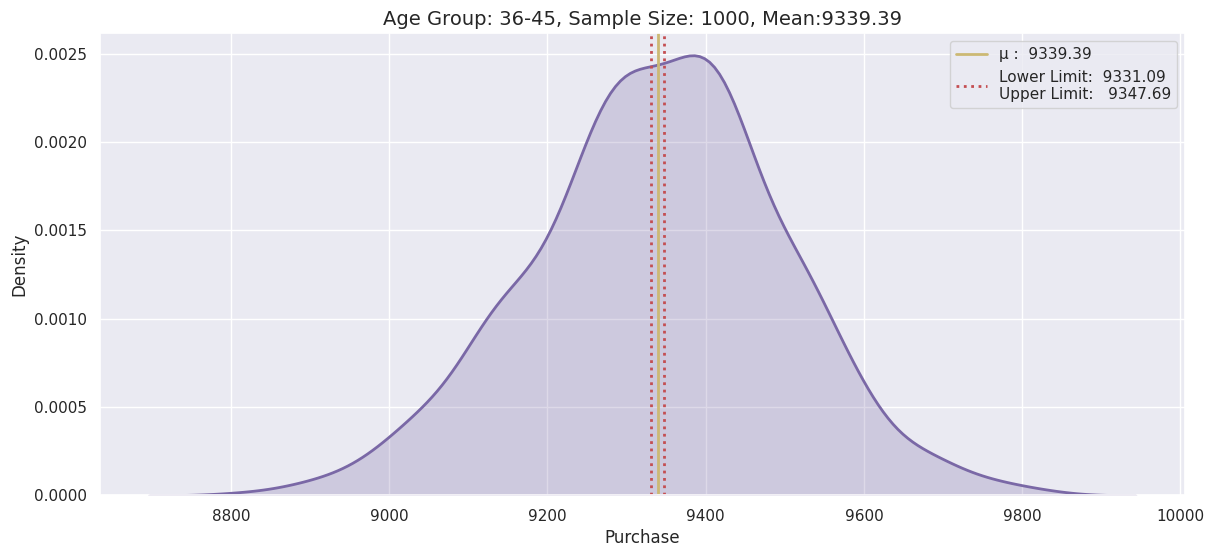

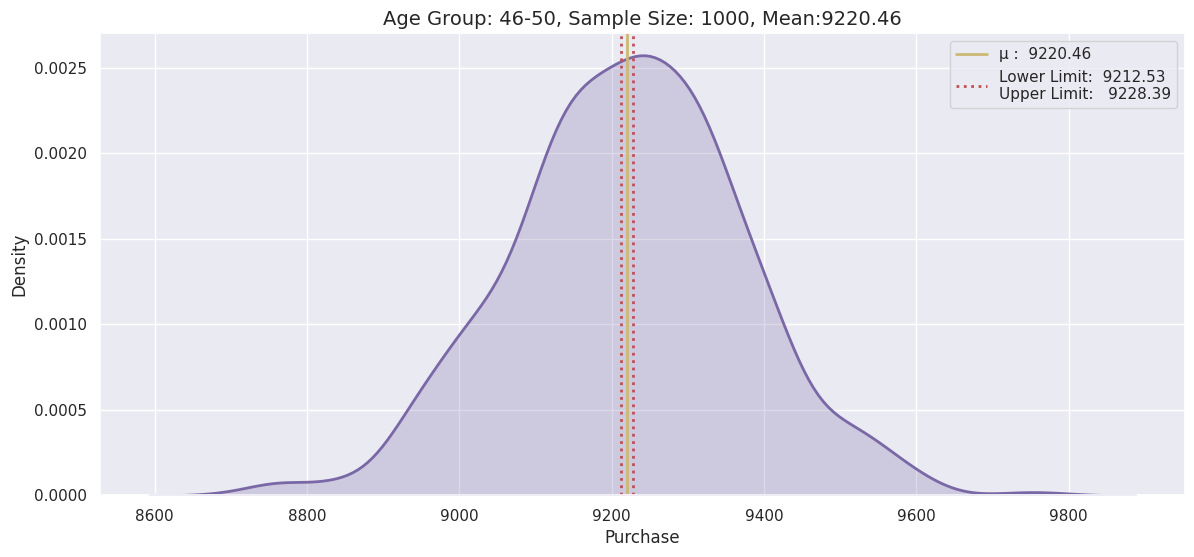

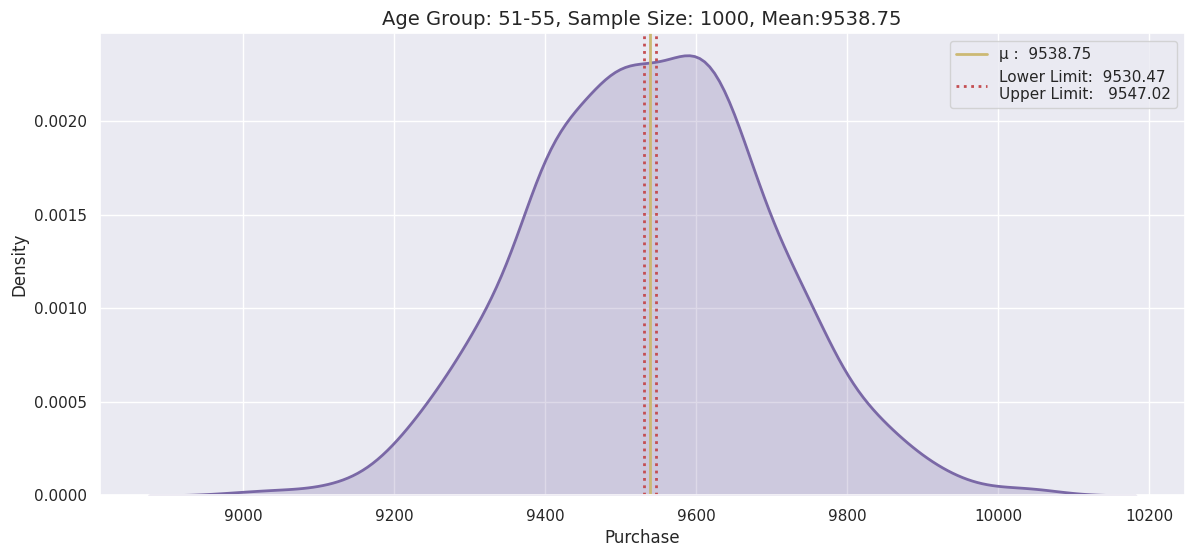

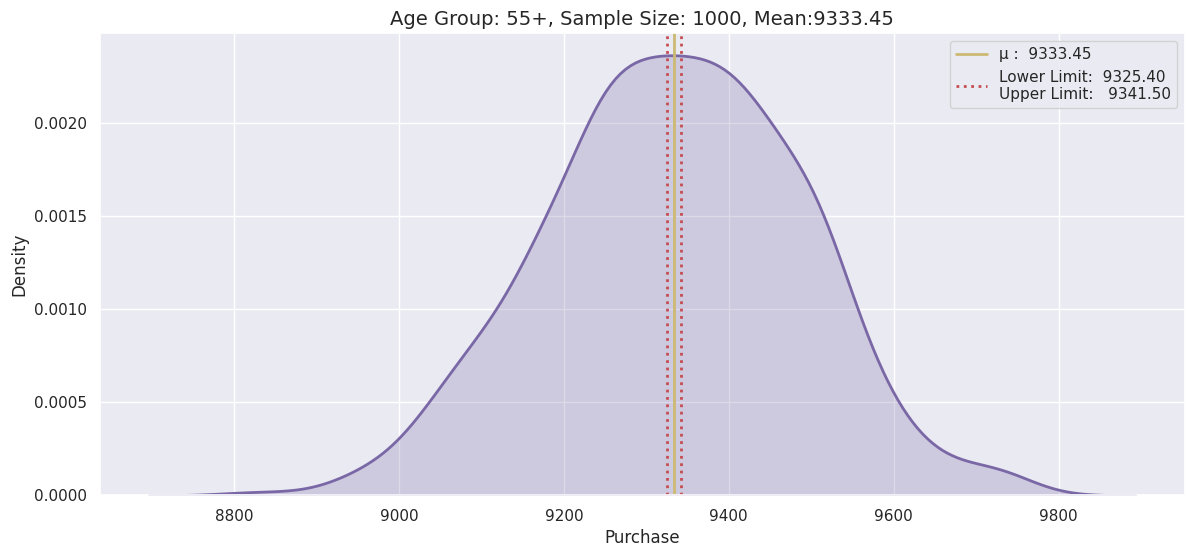

In [ ]:
ci = 90
itr_size = 1000
sample_size = 1000
flag = 0
# global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

res2 = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = sampling_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

    res2.loc[len(res2.index)] = {'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}

**Lets visualise the graphs of 1000 mean values of purchase samples for sample size of 1000 for all the age groups with 95% confidence interval.**

In [ ]:
ci = 95
itr_size = 1000
sample_size = 1000
flag = 0
# global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# res2 = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = sampling_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

    res2.loc[len(res2.index)] = {'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}

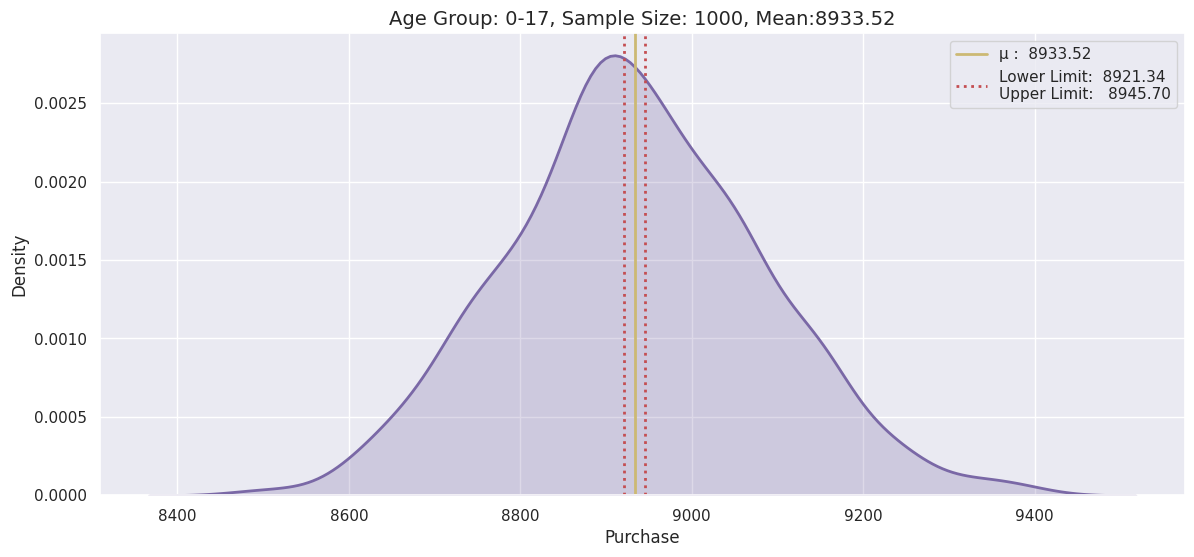

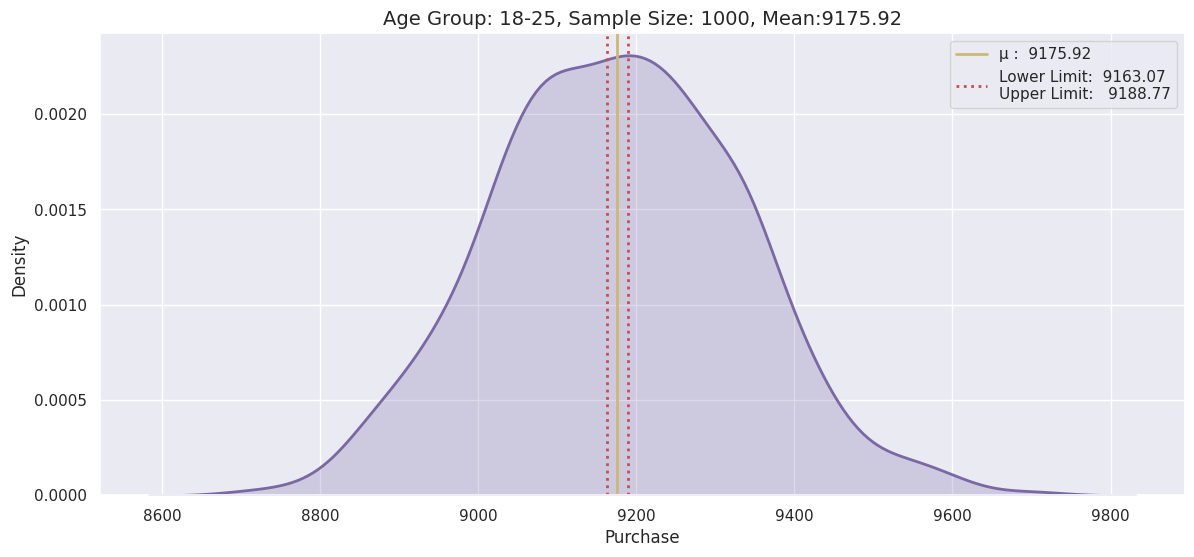

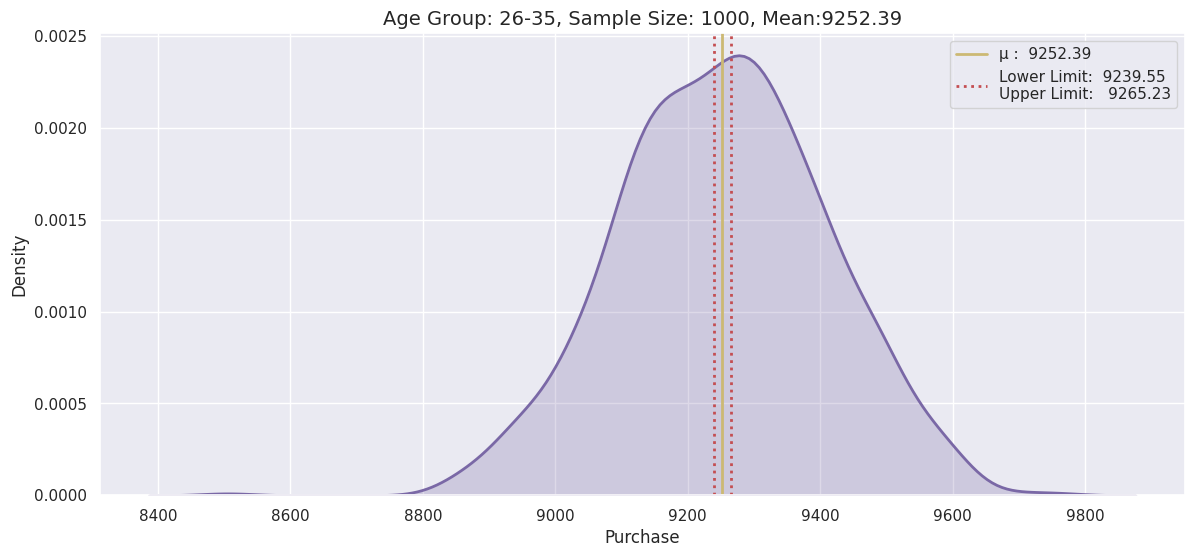

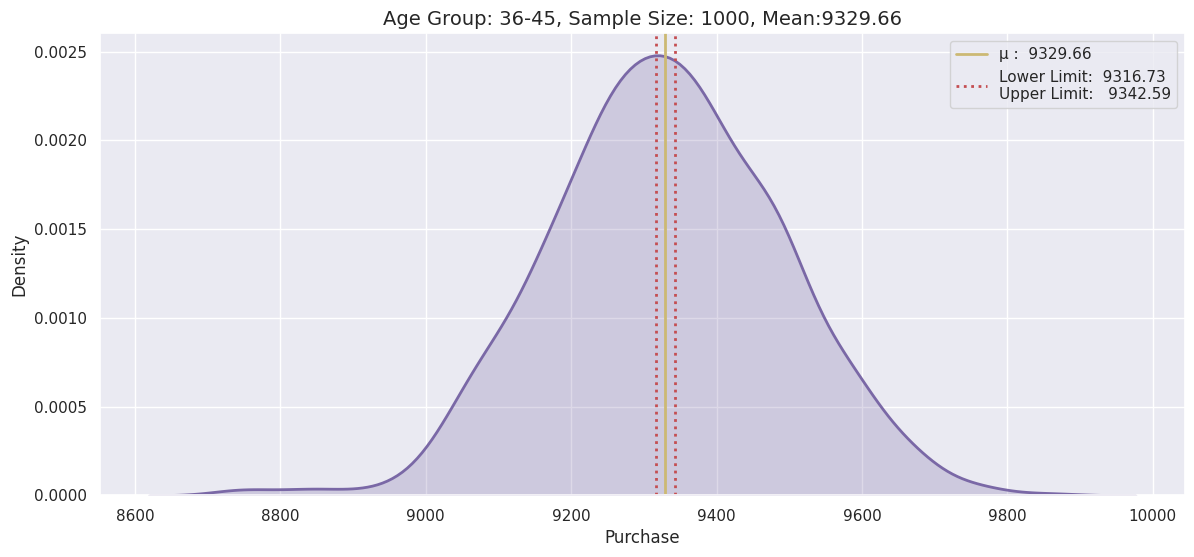

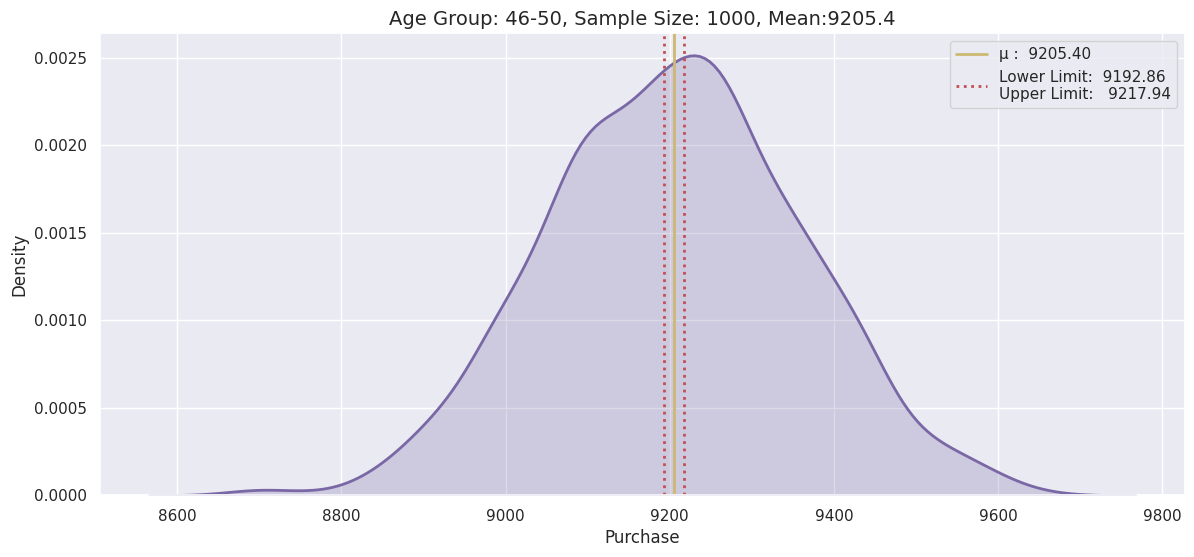

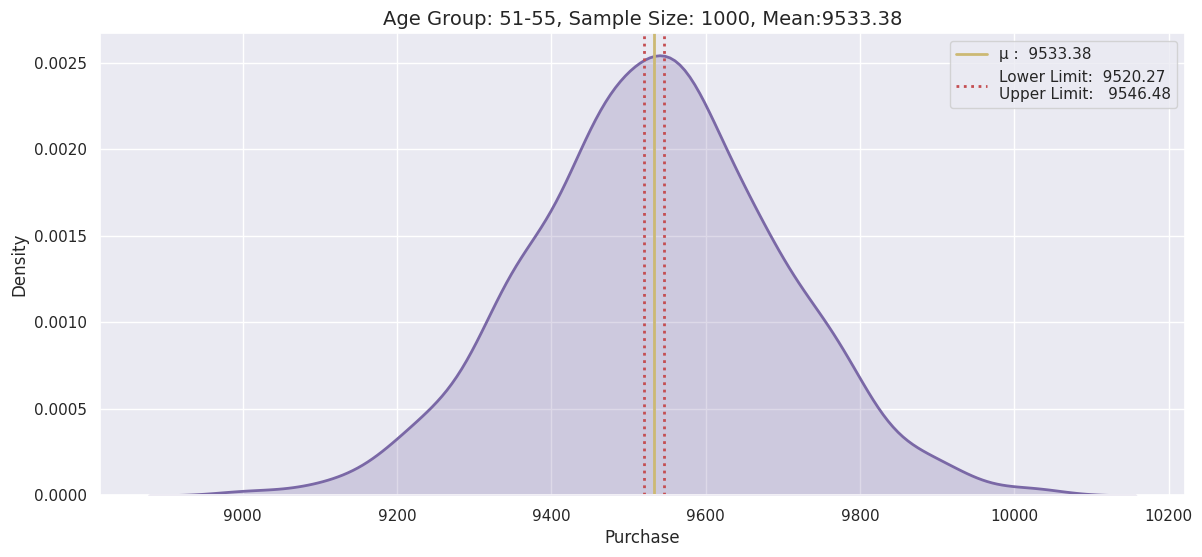

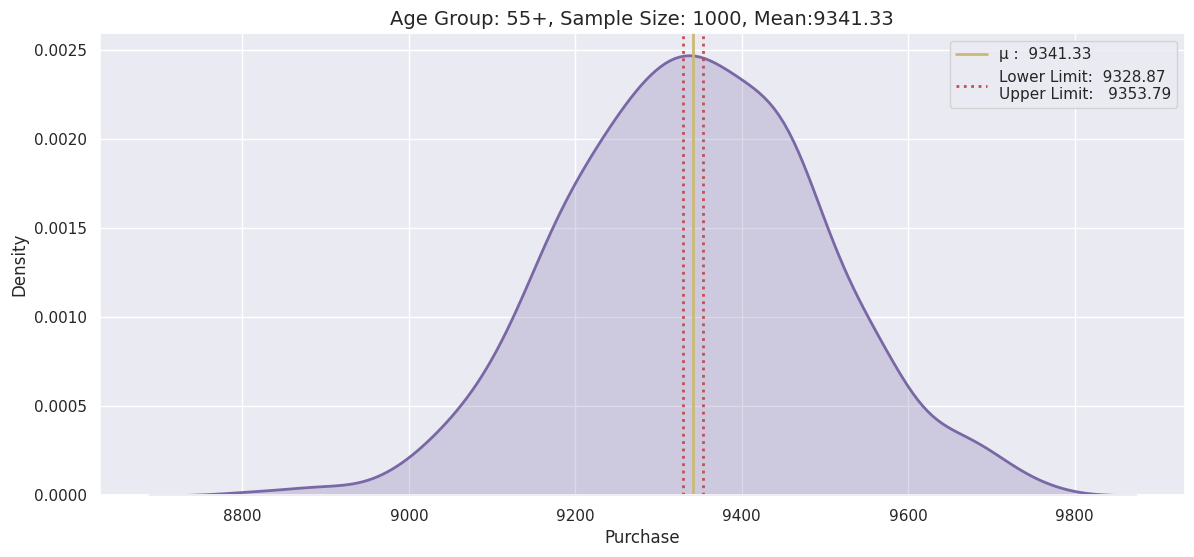

In [ ]:
ci = 99
itr_size = 1000
sample_size = 1000
flag = 0
# global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# res2 = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = sampling_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

    res2.loc[len(res2.index)] = {'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}

In [ ]:
res2

Age_Group  Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       0-17         1000      8922.14      8937.98      8930.06   
1      18-25         1000      9164.19      9180.56      9172.38   
2      26-35         1000      9238.46      9254.92      9246.69   
3      36-45         1000      9331.09      9347.69      9339.39   
4      46-50         1000      9212.53      9228.39      9220.46   
5      51-55         1000      9530.47      9547.02      9538.75   
6        55+         1000      9325.40      9341.50      9333.45   
7       0-17         1000      8921.34      8945.70      8933.52   
8      18-25         1000      9163.07      9188.77      9175.92   
9      26-35         1000      9239.55      9265.23      9252.39   
10     36-45         1000      9316.73      9342.59      9329.66   
11     46-50         1000      9192.86      9217.94      9205.40   
12     51-55         1000      9520.27      9546.48      9533.38   
13       55+         1000      9328.87      9353.79      9341.33   

    Confidence Interval      Interval Range  Range  
0                    90  [8922.14, 8937.98]  15.84  
1                    90  [9164.19, 9180.56]  16.37  
2                    90  [9238.46, 9254.92]  16.46  
3                    90  [9331.09, 9347.69]  16.60  
4                    90  [9212.53, 9228.39]  15.86  
5                    90  [9530.47, 9547.02]  16.55  
6                    90    [9325.4, 9341.5]  16.10  
7                    99   [8921.34, 8945.7]  24.36  
8                    99  [9163.07, 9188.77]  25.70  
9                    99  [9239.55, 9265.23]  25.68  
10                   99  [9316.73, 9342.59]  25.86  
11                   99  [9192.86, 9217.94]  25.08  
12                   99  [9520.27, 9546.48]  26.21  
13                   99  [9328.87, 9353.79]  24.92

**Inferences¶**

80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

75% of the users are Male and 25% are Female. Males clearly purchase more than females.

59% Single, 41% Married

35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

Majority of Customers purchase within the 5,000 - 20,000 range.

Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45

City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C

Most mall customers are between the ages of 26 and 35. City category C has more customers between the ages of 18 and 45.

In City Category C, there are slightly more female customers.

Product 5 and 8 is common among females.

**Recommendations**


Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on * selling more of these products or selling more of the products which are purchased less.

Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45.

Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

The management should have some offers on kids (0-17 years) in order to increase sales.

In order to attract more young shoppers, they can offer some games for the younger generation.